In [1]:
import warnings
import numpy as np
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import adjusted_rand_score as ari
import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype
import matplotlib.pyplot as plt

In [2]:
np.set_printoptions(suppress=True, precision=3, linewidth=250)

### Loading Data set

## Dataset

This dataset about video game sales. The dataset contains **6825** objects. Each object represents a game, it's sales and ratings, which is described by **16** features.

## Features description

1. "Name" - name of the game, metadata
2. "Platform" - name of the game platform, categorical
3. "Year_of_Release" - the year, in which the game was released, quantitative
4. "Genre" - genre of the game, categorical
5. "Publisher" - name of the game's publisher, categorical
6. "NA_Sales" - sales of the game in Noth Americain millions copies, quantitative
7. "EU_Sales" - sales of the game in European Union (EU) in millions copies, quantitative
8. "JP_Sales" - sales of the game in Japan in millions copies, quantitative
9. "Other_Sales" - sales of the game in other parts of the world in millions copies, quantitative
10. "Global_Sales" - global sales of the game over the world in millions copies, quantitative
11. "Critic_Score" - score, given to the game by a critic from 0 to 100, quantitative
12. "Critic_Count" - amount of the game's critics, quantitative
13. "User_Score" - user's game score from 0 to 10, quantitative
14. "User_Count" - amount of the game's users, quantitative
15. "Developer" - name of the game's developer, categorical
16. "Rating" - rating of the game, quantitative

In [3]:
df = pd.read_csv('star_dataset.csv')
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [4]:
df = df.dropna()

In [5]:
quantitative_columns = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']

X = df[quantitative_columns]
X

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
0,3068,0.002400,0.1700,16.12
1,3042,0.000500,0.1542,16.60
2,2600,0.000300,0.1020,18.70
3,2800,0.000200,0.1600,16.65
4,1939,0.000138,0.1030,20.06
...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93
236,30839,834042.000000,1194.0000,-10.63
237,8829,537493.000000,1423.0000,-10.73
238,9235,404940.000000,1112.0000,-11.23


### Applying Batch K-Means 

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Ks = np.arange(2,10)

X_scaled = StandardScaler().fit_transform(X)

inertias = np.array([])

kmeans = [None]*8
for k in Ks:
    best_inertia = 1e10
    for i in range(10):
        kmeans = KMeans(n_clusters=k, n_init = 1, max_iter = 500, init='random', 
                           tol=1e-4, algorithm='full', random_state = i).fit(X_scaled)
        tmp_inertia = kmeans.inertia_
        tmp_labels = kmeans.labels_
        
        if tmp_inertia < best_inertia:
            best_inertia = tmp_inertia
            best_labels = tmp_labels
    df['cluster_id_' + str(k)] = best_labels
    inertias = np.append(inertias, best_inertia)
    print(best_inertia)

507.7393300223727
332.80406678544693
256.8953857589539
205.07753502029152
157.66306262844992
136.50785707441952
124.02199365424596
103.07284513316148


In [7]:
print(inertias)

[507.739 332.804 256.895 205.078 157.663 136.508 124.022 103.073]


In [21]:
categorical_columns = ["Star type", "Star color", "Spectral Class"]

In [22]:
season_unique = df["Star type"].unique()
season_num = [len(df[df.season==el]) for el in season_unique]

holiday_unique = df["Star color"].unique()
holiday_num = [len(df[df.holiday==el]) for el in holiday_unique]

workingday_unique = df["Spectral Class"].unique()
workingday_num = [len(df[df.workingday==el]) for el in workingday_unique]

# Season

634 of 2686 (0.24) belong to 0-th class
1331 of 2733 (0.49) belong to 0-th class
1533 of 2733 (0.56) belong to 0-th class
820 of 2734 (0.3) belong to 0-th class

2052 of 2686 (0.76) belong to 1-th class
1402 of 2733 (0.51) belong to 1-th class
1200 of 2733 (0.44) belong to 1-th class
1914 of 2734 (0.7) belong to 1-th class



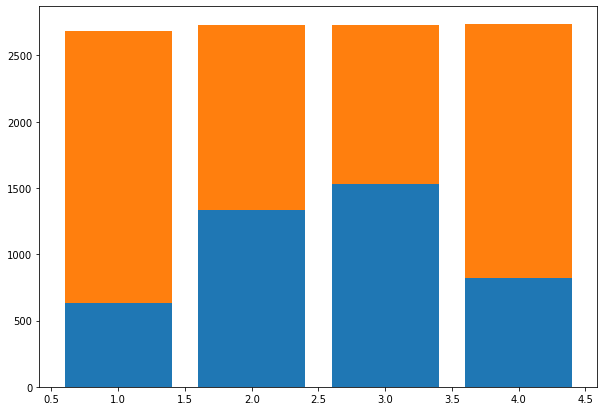

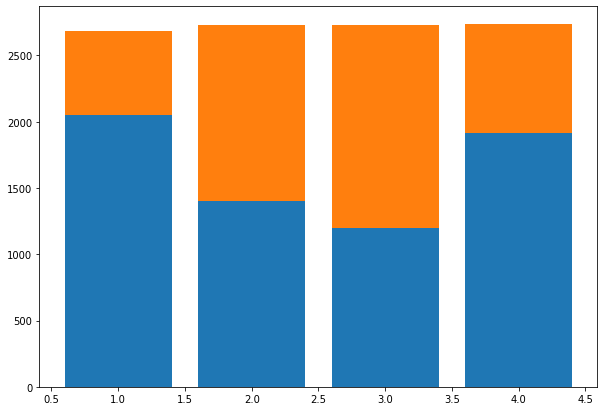

In [23]:
for i in range(2):
    fig, ax = plt.subplots(figsize = (10,7))
    

    season_num_for_cluster = np.array([len(df[(df.cluster_id_2==i)&(df.season == el)]) for el in season_unique])

    ax.bar(season_unique, season_num_for_cluster, label='for cluster')
    ax.bar(season_unique, season_num-season_num_for_cluster, bottom=season_num_for_cluster, label='general')
    
    for j, el in enumerate(season_unique):
        print("{} of {} ({}) belong to {}-th class".format(season_num_for_cluster[j], season_num[j], 
                                                           round(season_num_for_cluster[j]/season_num[j],2), i))
    print()

923 of 2686 (0.34) belong to 0-th class
1182 of 2733 (0.43) belong to 0-th class
1195 of 2733 (0.44) belong to 0-th class
1370 of 2734 (0.5) belong to 0-th class

1603 of 2686 (0.6) belong to 1-th class
505 of 2733 (0.18) belong to 1-th class
49 of 2733 (0.02) belong to 1-th class
855 of 2734 (0.31) belong to 1-th class

160 of 2686 (0.06) belong to 2-th class
1046 of 2733 (0.38) belong to 2-th class
1489 of 2733 (0.54) belong to 2-th class
509 of 2734 (0.19) belong to 2-th class



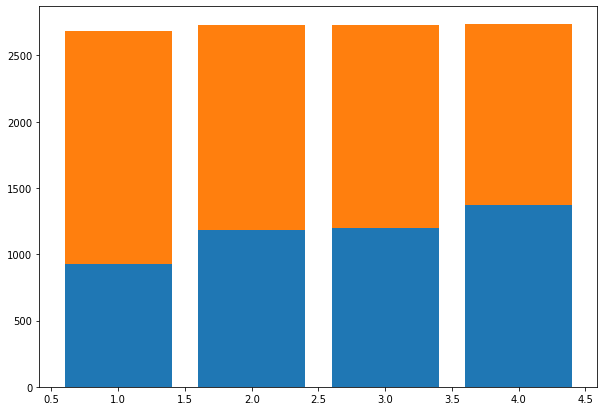

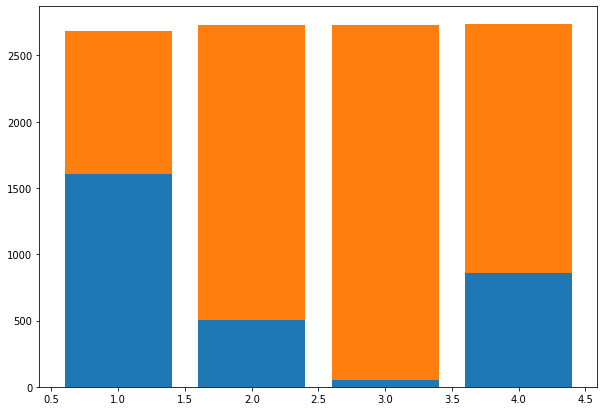

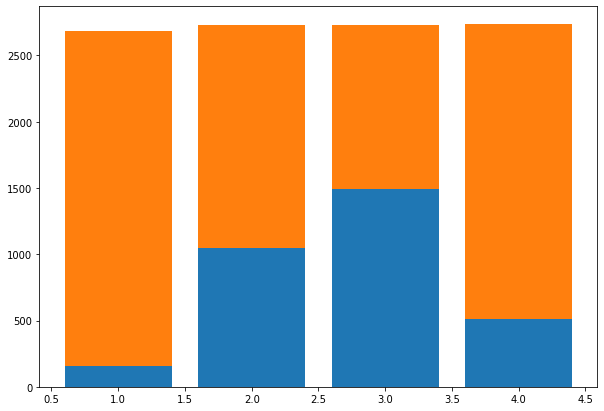

In [24]:
for i in range(3):
    fig, ax = plt.subplots(figsize = (10,7))
    

    season_num_for_cluster = np.array([len(df[(df.cluster_id_3==i)&(df.season == el)]) for el in season_unique])

    ax.bar(season_unique, season_num_for_cluster, label='for cluster')
    ax.bar(season_unique, season_num-season_num_for_cluster, bottom=season_num_for_cluster, label='general')
    
    for j, el in enumerate(season_unique):
        print("{} of {} ({}) belong to {}-th class".format(season_num_for_cluster[j], season_num[j], 
                                                           round(season_num_for_cluster[j]/season_num[j],2), i))
    print()

1162 of 2686 (0.43) belong to 0-th class
456 of 2733 (0.17) belong to 0-th class
46 of 2733 (0.02) belong to 0-th class
635 of 2734 (0.23) belong to 0-th class

1232 of 2686 (0.46) belong to 1-th class
363 of 2733 (0.13) belong to 1-th class
20 of 2733 (0.01) belong to 1-th class
1138 of 2734 (0.42) belong to 1-th class

142 of 2686 (0.05) belong to 2-th class
900 of 2733 (0.33) belong to 2-th class
1225 of 2733 (0.45) belong to 2-th class
452 of 2734 (0.17) belong to 2-th class

150 of 2686 (0.06) belong to 3-th class
1014 of 2733 (0.37) belong to 3-th class
1442 of 2733 (0.53) belong to 3-th class
509 of 2734 (0.19) belong to 3-th class



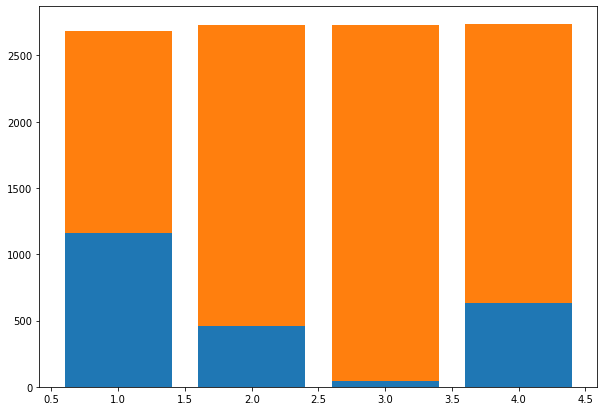

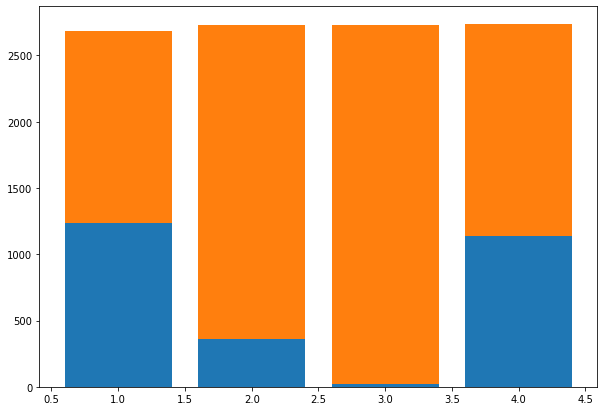

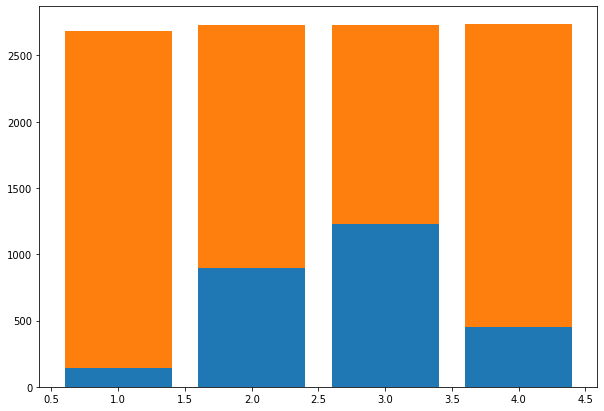

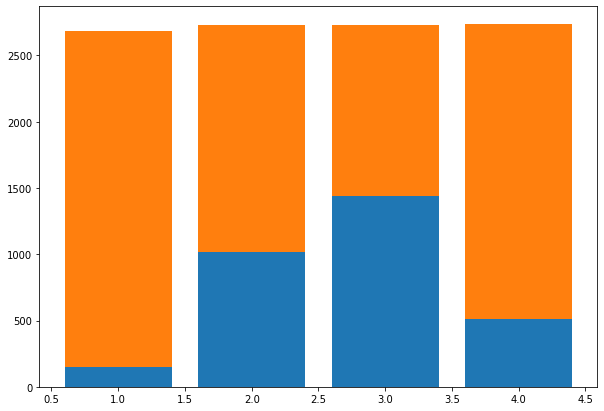

In [25]:
for i in range(4):
    fig, ax = plt.subplots(figsize = (10,7))
    

    season_num_for_cluster = np.array([len(df[(df.cluster_id_4==i)&(df.season == el)]) for el in season_unique])

    ax.bar(season_unique, season_num_for_cluster, label='for cluster')
    ax.bar(season_unique, season_num-season_num_for_cluster, bottom=season_num_for_cluster, label='general')
    
    for j, el in enumerate(season_unique):
        print("{} of {} ({}) belong to {}-th class".format(season_num_for_cluster[j], season_num[j], 
                                                           round(season_num_for_cluster[j]/season_num[j],2), i))
    print()

230 of 2686 (0.09) belong to 0-th class
911 of 2733 (0.33) belong to 0-th class
1106 of 2733 (0.4) belong to 0-th class
671 of 2734 (0.25) belong to 0-th class

1094 of 2686 (0.41) belong to 1-th class
415 of 2733 (0.15) belong to 1-th class
43 of 2733 (0.02) belong to 1-th class
590 of 2734 (0.22) belong to 1-th class

1172 of 2686 (0.44) belong to 2-th class
282 of 2733 (0.1) belong to 2-th class
14 of 2733 (0.01) belong to 2-th class
945 of 2734 (0.35) belong to 2-th class

98 of 2686 (0.04) belong to 3-th class
437 of 2733 (0.16) belong to 3-th class
441 of 2733 (0.16) belong to 3-th class
344 of 2734 (0.13) belong to 3-th class

92 of 2686 (0.03) belong to 4-th class
688 of 2733 (0.25) belong to 4-th class
1129 of 2733 (0.41) belong to 4-th class
184 of 2734 (0.07) belong to 4-th class



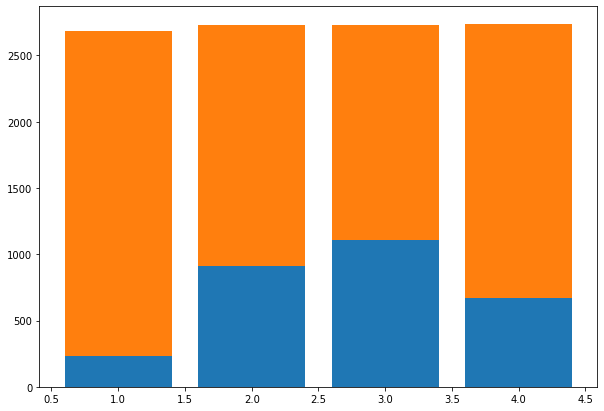

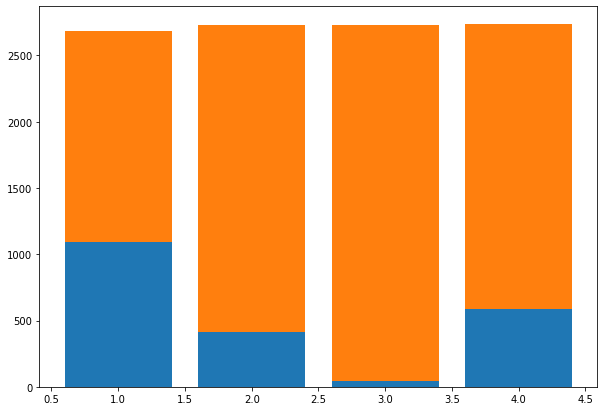

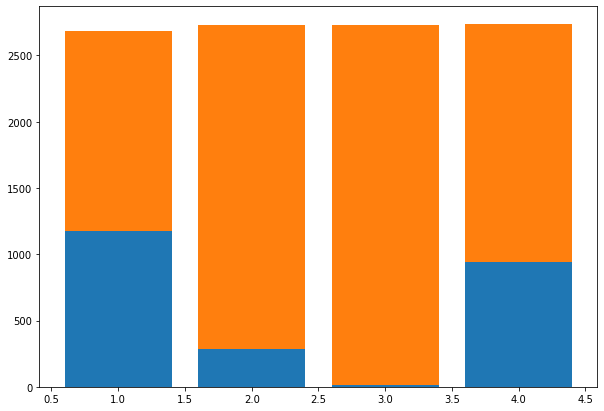

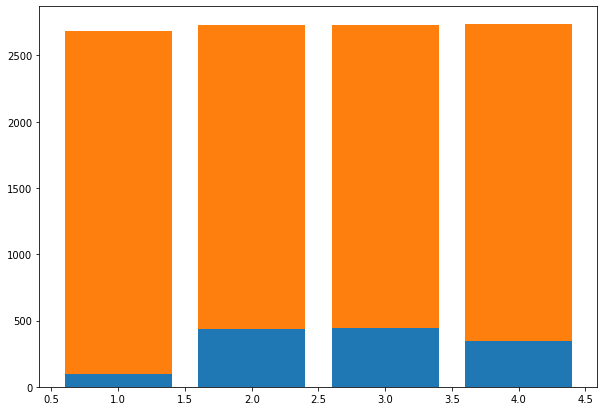

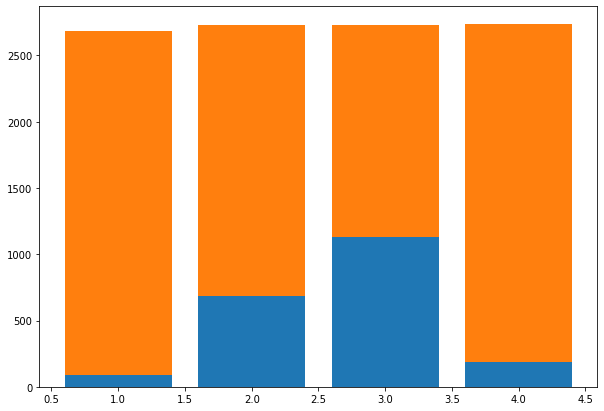

In [26]:
for i in range(5):
    fig, ax = plt.subplots(figsize = (10,7))
    

    season_num_for_cluster = np.array([len(df[(df.cluster_id_5==i)&(df.season == el)]) for el in season_unique])

    ax.bar(season_unique, season_num_for_cluster, label='for cluster')
    ax.bar(season_unique, season_num-season_num_for_cluster, bottom=season_num_for_cluster, label='general')
    
    for j, el in enumerate(season_unique):
        print("{} of {} ({}) belong to {}-th class".format(season_num_for_cluster[j], season_num[j], 
                                                           round(season_num_for_cluster[j]/season_num[j],2), i))
    print()

72 of 2686 (0.03) belong to 0-th class
614 of 2733 (0.22) belong to 0-th class
1030 of 2733 (0.38) belong to 0-th class
153 of 2734 (0.06) belong to 0-th class

79 of 2686 (0.03) belong to 1-th class
411 of 2733 (0.15) belong to 1-th class
419 of 2733 (0.15) belong to 1-th class
322 of 2734 (0.12) belong to 1-th class

541 of 2686 (0.2) belong to 2-th class
335 of 2733 (0.12) belong to 2-th class
59 of 2733 (0.02) belong to 2-th class
298 of 2734 (0.11) belong to 2-th class

133 of 2686 (0.05) belong to 3-th class
825 of 2733 (0.3) belong to 3-th class
1178 of 2733 (0.43) belong to 3-th class
411 of 2734 (0.15) belong to 3-th class

1162 of 2686 (0.43) belong to 4-th class
207 of 2733 (0.08) belong to 4-th class
3 of 2733 (0.0) belong to 4-th class
683 of 2734 (0.25) belong to 4-th class

699 of 2686 (0.26) belong to 5-th class
341 of 2733 (0.12) belong to 5-th class
44 of 2733 (0.02) belong to 5-th class
867 of 2734 (0.32) belong to 5-th class



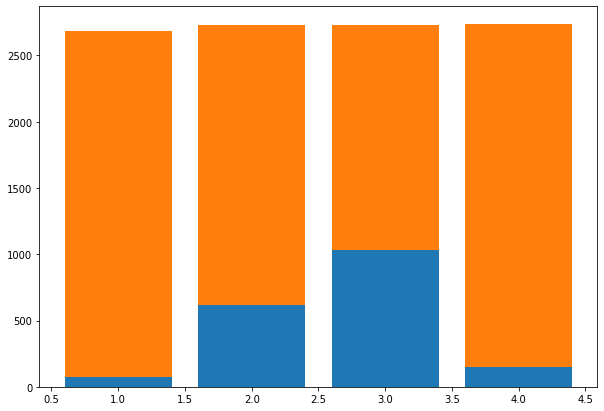

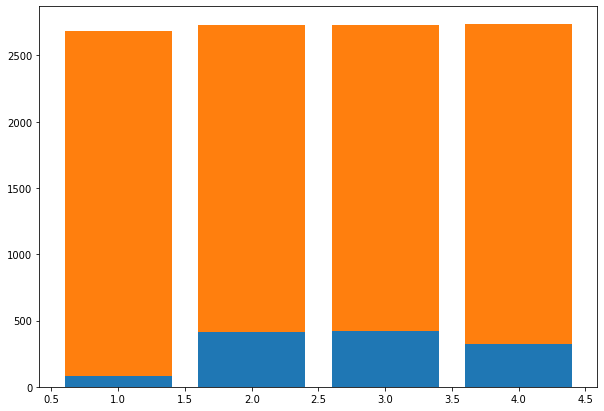

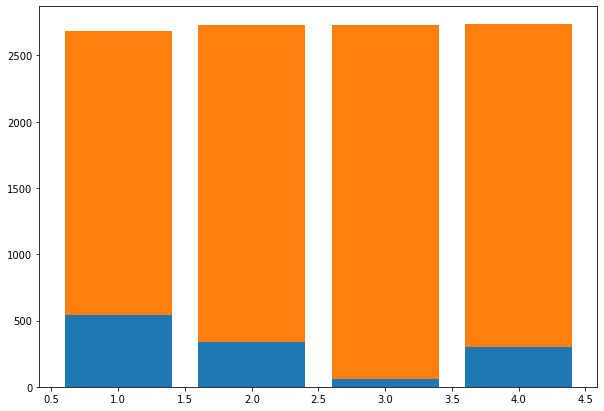

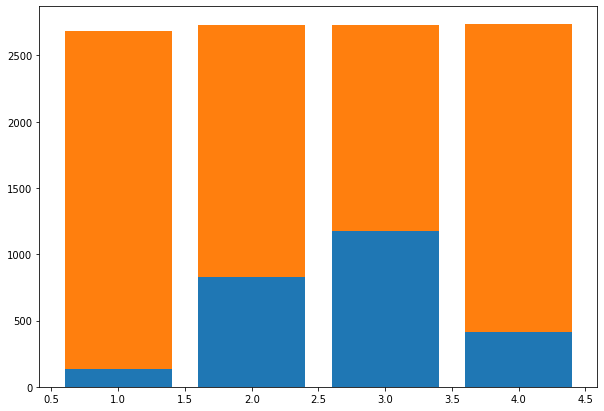

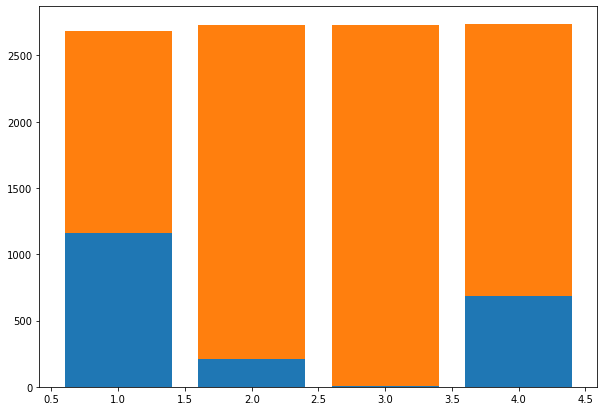

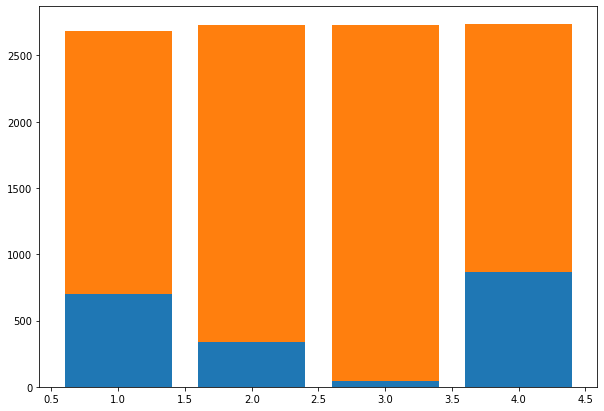

In [27]:
for i in range(6):
    fig, ax = plt.subplots(figsize = (10,7))
    

    season_num_for_cluster = np.array([len(df[(df.cluster_id_6==i)&(df.season == el)]) for el in season_unique])

    ax.bar(season_unique, season_num_for_cluster, label='for cluster')
    ax.bar(season_unique, season_num-season_num_for_cluster, bottom=season_num_for_cluster, label='general')
    
    for j, el in enumerate(season_unique):
        print("{} of {} ({}) belong to {}-th class".format(season_num_for_cluster[j], season_num[j], 
                                                           round(season_num_for_cluster[j]/season_num[j],2), i))
    print()

34 of 2686 (0.01) belong to 0-th class
580 of 2733 (0.21) belong to 0-th class
1019 of 2733 (0.37) belong to 0-th class
240 of 2734 (0.09) belong to 0-th class

521 of 2686 (0.19) belong to 1-th class
278 of 2733 (0.1) belong to 1-th class
27 of 2733 (0.01) belong to 1-th class
245 of 2734 (0.09) belong to 1-th class

69 of 2686 (0.03) belong to 2-th class
588 of 2733 (0.22) belong to 2-th class
977 of 2733 (0.36) belong to 2-th class
134 of 2734 (0.05) belong to 2-th class

78 of 2686 (0.03) belong to 3-th class
384 of 2733 (0.14) belong to 3-th class
392 of 2733 (0.14) belong to 3-th class
312 of 2734 (0.11) belong to 3-th class

1097 of 2686 (0.41) belong to 4-th class
199 of 2733 (0.07) belong to 4-th class
2 of 2733 (0.0) belong to 4-th class
661 of 2734 (0.24) belong to 4-th class

228 of 2686 (0.08) belong to 5-th class
459 of 2733 (0.17) belong to 5-th class
310 of 2733 (0.11) belong to 5-th class
363 of 2734 (0.13) belong to 5-th class

659 of 2686 (0.25) belong to 6-th class


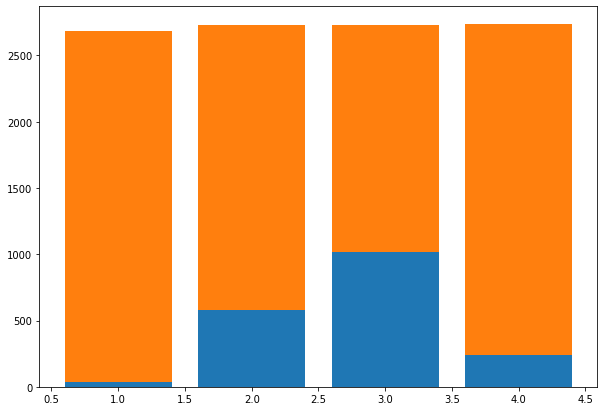

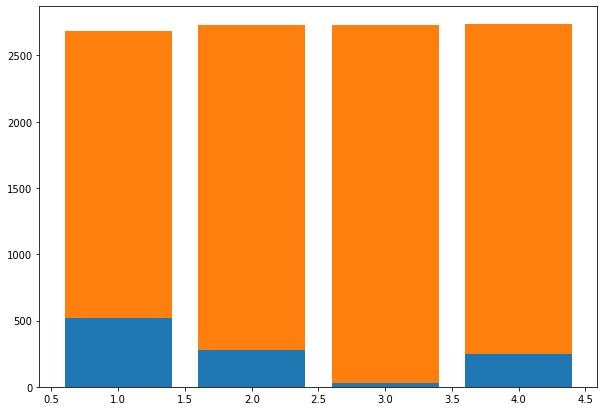

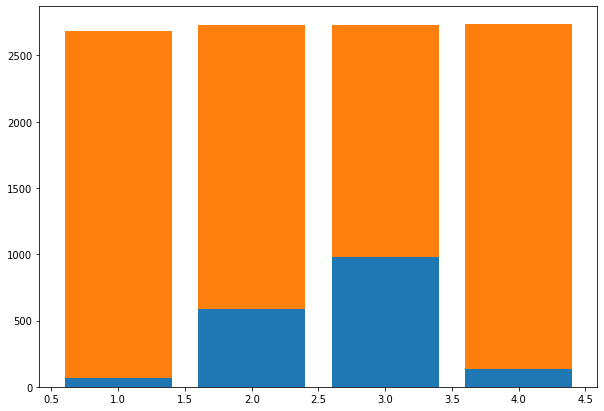

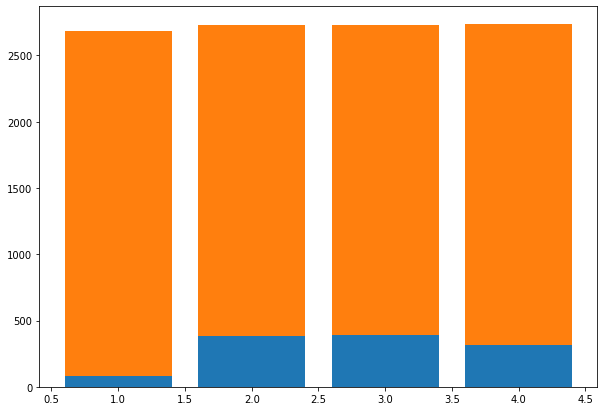

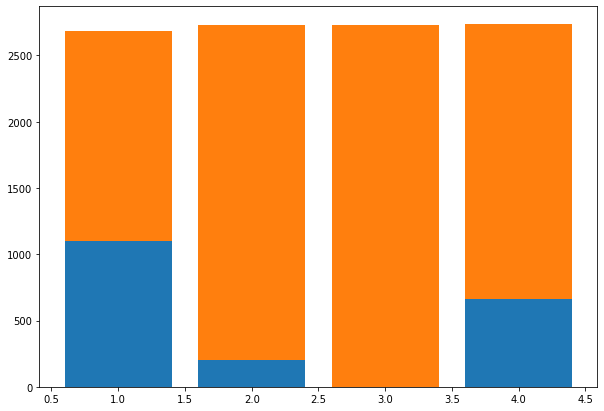

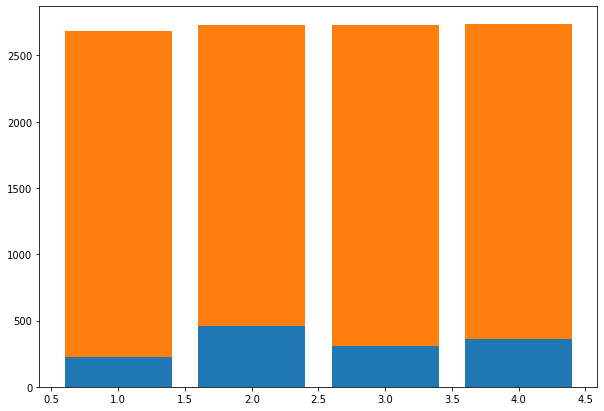

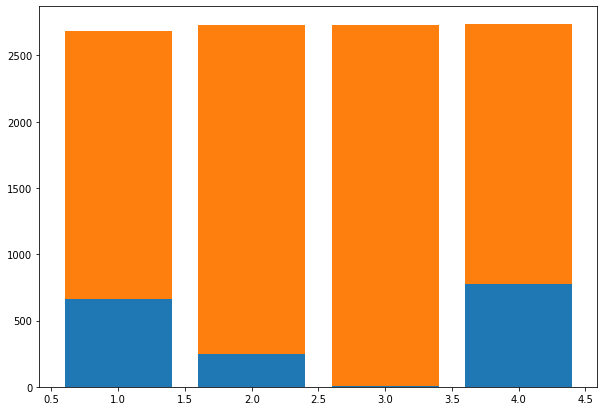

In [28]:
for i in range(7):
    fig, ax = plt.subplots(figsize = (10,7))
    

    season_num_for_cluster = np.array([len(df[(df.cluster_id_7==i)&(df.season == el)]) for el in season_unique])

    ax.bar(season_unique, season_num_for_cluster, label='for cluster')
    ax.bar(season_unique, season_num-season_num_for_cluster, bottom=season_num_for_cluster, label='general')
    
    for j, el in enumerate(season_unique):
        print("{} of {} ({}) belong to {}-th class".format(season_num_for_cluster[j], season_num[j], 
                                                           round(season_num_for_cluster[j]/season_num[j],2), i))
    print()

50 of 2686 (0.02) belong to 0-th class
325 of 2733 (0.12) belong to 0-th class
335 of 2733 (0.12) belong to 0-th class
126 of 2734 (0.05) belong to 0-th class

219 of 2686 (0.08) belong to 1-th class
425 of 2733 (0.16) belong to 1-th class
293 of 2733 (0.11) belong to 1-th class
333 of 2734 (0.12) belong to 1-th class

68 of 2686 (0.03) belong to 2-th class
530 of 2733 (0.19) belong to 2-th class
876 of 2733 (0.32) belong to 2-th class
115 of 2734 (0.04) belong to 2-th class

513 of 2686 (0.19) belong to 3-th class
260 of 2733 (0.1) belong to 3-th class
23 of 2733 (0.01) belong to 3-th class
238 of 2734 (0.09) belong to 3-th class

31 of 2686 (0.01) belong to 4-th class
532 of 2733 (0.19) belong to 4-th class
946 of 2733 (0.35) belong to 4-th class
198 of 2734 (0.07) belong to 4-th class

77 of 2686 (0.03) belong to 5-th class
238 of 2733 (0.09) belong to 5-th class
255 of 2733 (0.09) belong to 5-th class
401 of 2734 (0.15) belong to 5-th class

1084 of 2686 (0.4) belong to 6-th class


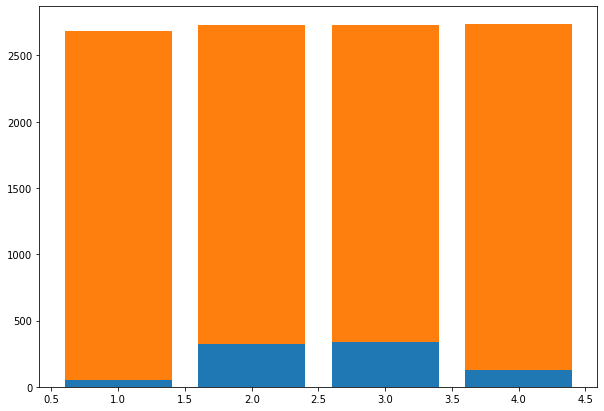

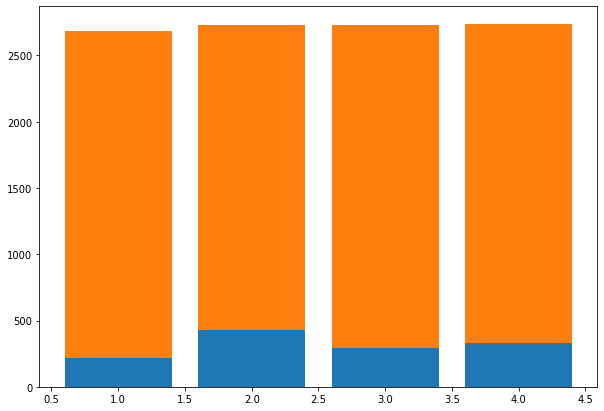

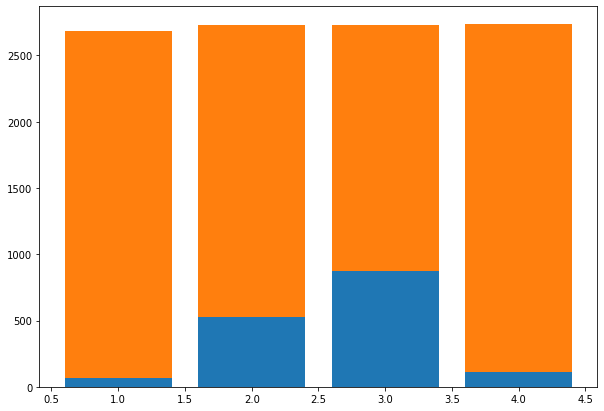

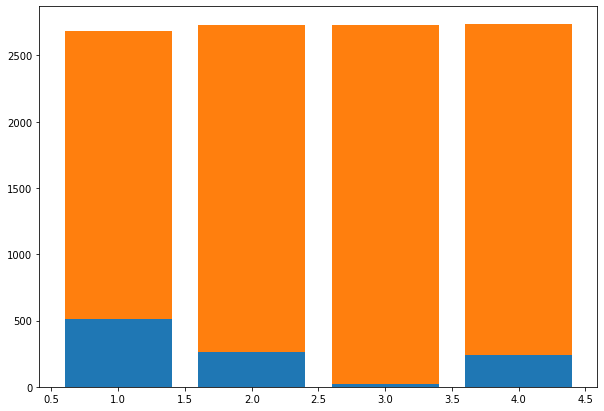

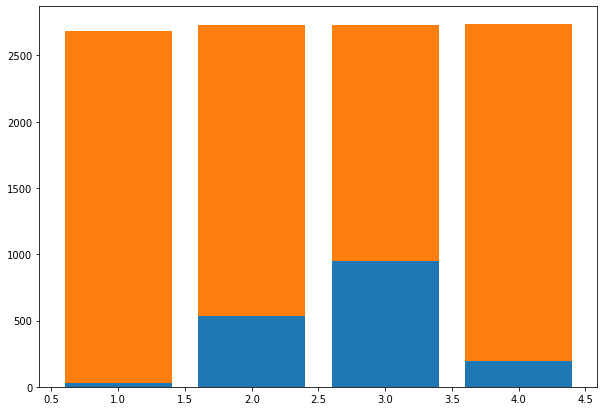

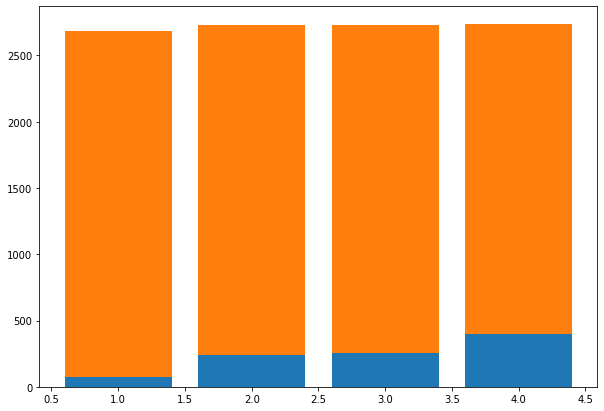

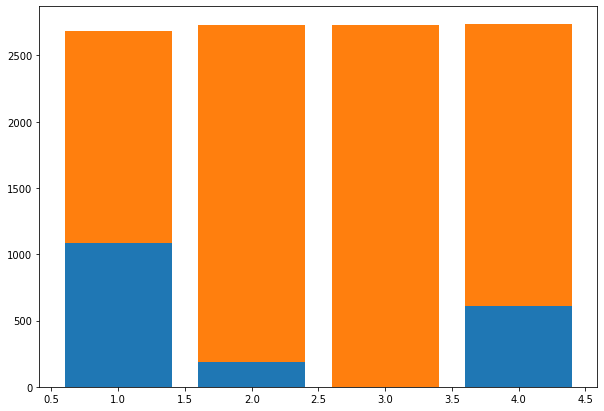

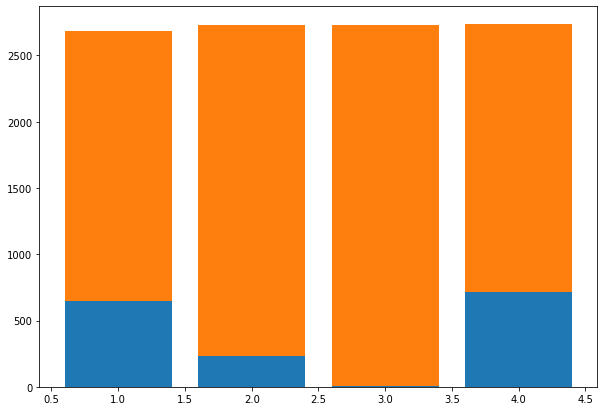

In [29]:
for i in range(8):
    fig, ax = plt.subplots(figsize = (10,7))
    

    season_num_for_cluster = np.array([len(df[(df.cluster_id_8==i)&(df.season == el)]) for el in season_unique])

    ax.bar(season_unique, season_num_for_cluster, label='for cluster')
    ax.bar(season_unique, season_num-season_num_for_cluster, bottom=season_num_for_cluster, label='general')
    
    for j, el in enumerate(season_unique):
        print("{} of {} ({}) belong to {}-th class".format(season_num_for_cluster[j], season_num[j], 
                                                           round(season_num_for_cluster[j]/season_num[j],2), i))
    print()

808 of 2686 (0.3) belong to 0-th class
192 of 2733 (0.07) belong to 0-th class
3 of 2733 (0.0) belong to 0-th class
516 of 2734 (0.19) belong to 0-th class

27 of 2686 (0.01) belong to 1-th class
499 of 2733 (0.18) belong to 1-th class
922 of 2733 (0.34) belong to 1-th class
181 of 2734 (0.07) belong to 1-th class

33 of 2686 (0.01) belong to 2-th class
267 of 2733 (0.1) belong to 2-th class
304 of 2733 (0.11) belong to 2-th class
130 of 2734 (0.05) belong to 2-th class

190 of 2686 (0.07) belong to 3-th class
309 of 2733 (0.11) belong to 3-th class
86 of 2733 (0.03) belong to 3-th class
187 of 2734 (0.07) belong to 3-th class

199 of 2686 (0.07) belong to 4-th class
422 of 2733 (0.15) belong to 4-th class
301 of 2733 (0.11) belong to 4-th class
341 of 2734 (0.12) belong to 4-th class

74 of 2686 (0.03) belong to 5-th class
248 of 2733 (0.09) belong to 5-th class
265 of 2733 (0.1) belong to 5-th class
345 of 2734 (0.13) belong to 5-th class

55 of 2686 (0.02) belong to 6-th class
472 o

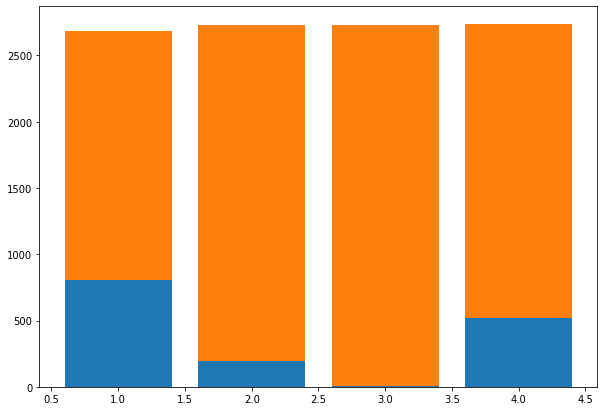

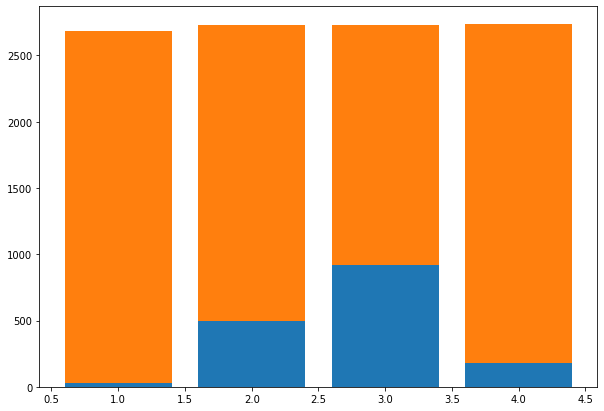

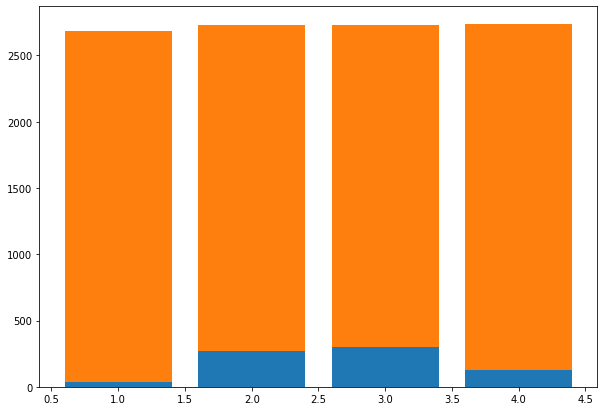

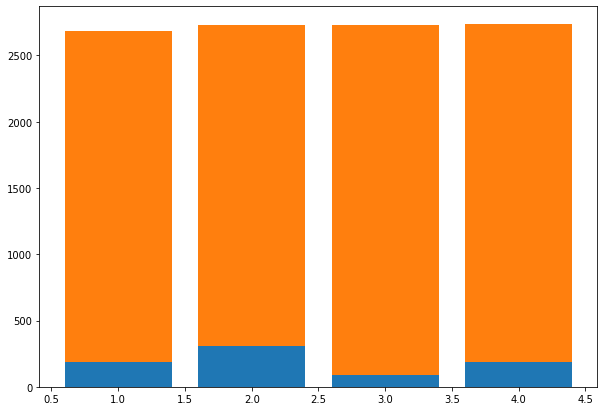

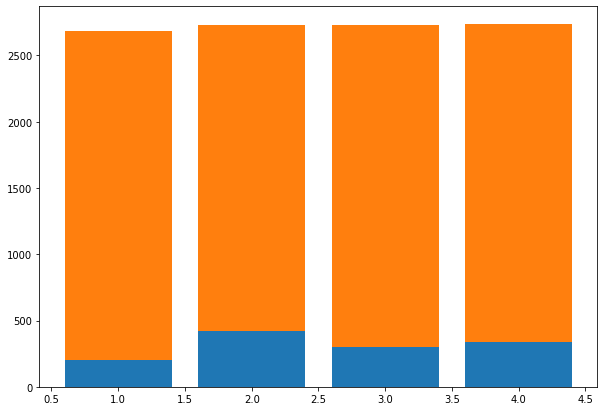

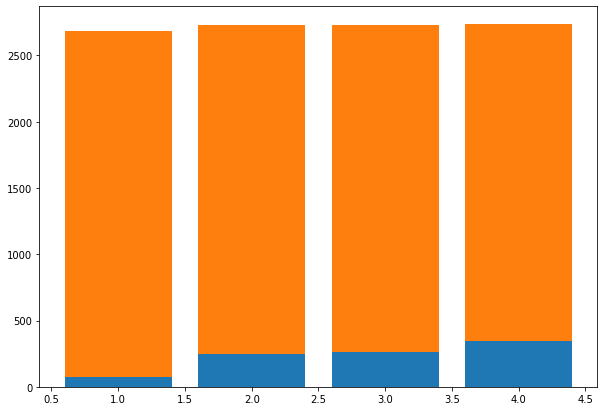

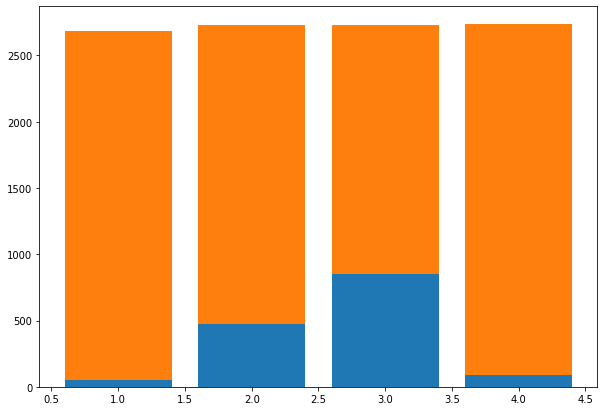

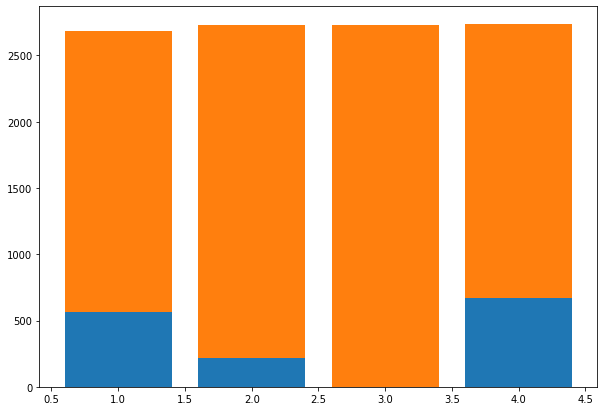

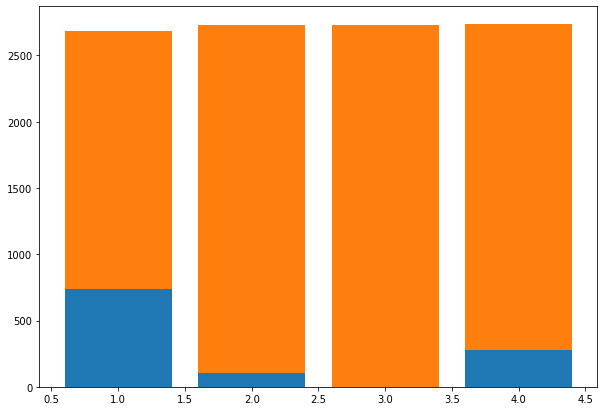

In [30]:
for i in range(9):
    fig, ax = plt.subplots(figsize = (10,7))
    

    season_num_for_cluster = np.array([len(df[(df.cluster_id_9==i)&(df.season == el)]) for el in season_unique])

    ax.bar(season_unique, season_num_for_cluster, label='for cluster')
    ax.bar(season_unique, season_num-season_num_for_cluster, bottom=season_num_for_cluster, label='general')
    
    for j, el in enumerate(season_unique):
        print("{} of {} ({}) belong to {}-th class".format(season_num_for_cluster[j], season_num[j], 
                                                           round(season_num_for_cluster[j]/season_num[j],2), i))
    print()

# Holiday

4195 of 10575 (0.4) belong to 0-th class
123 of 311 (0.4) belong to 0-th class

6380 of 10575 (0.6) belong to 1-th class
188 of 311 (0.6) belong to 1-th class



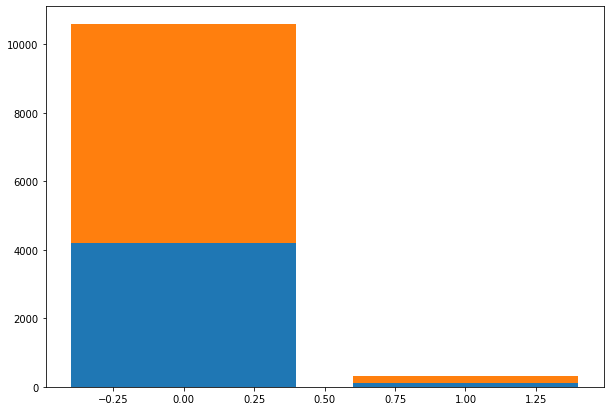

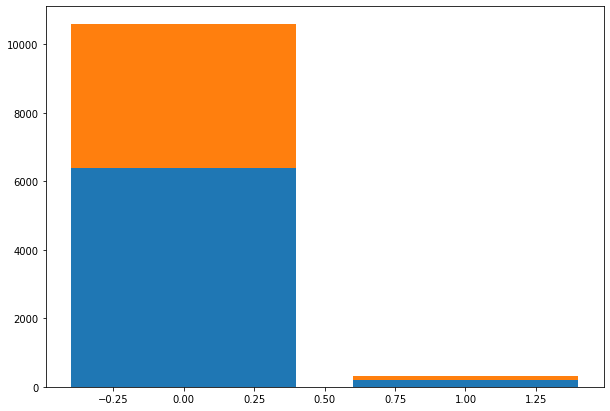

In [31]:
for i in range(2):
    fig, ax = plt.subplots(figsize = (10,7))
    

    holiday_num_for_cluster = np.array([len(df[(df.cluster_id_2==i)&(df.holiday == el)]) for el in holiday_unique])

    holiday_num = np.array([len(df[df.holiday==el]) for el in holiday_unique])

    ax.bar(holiday_unique, holiday_num_for_cluster, label='for cluster')
    ax.bar(holiday_unique, holiday_num-holiday_num_for_cluster, bottom=holiday_num_for_cluster, label='general')
    
    for j, el in enumerate(holiday_unique):
        print("{} of {} ({}) belong to {}-th class".format(holiday_num_for_cluster[j], holiday_num[j], 
                                                           round(holiday_num_for_cluster[j]/holiday_num[j],2), i))
    print()

4555 of 10575 (0.43) belong to 0-th class
115 of 311 (0.37) belong to 0-th class

2905 of 10575 (0.27) belong to 1-th class
107 of 311 (0.34) belong to 1-th class

3115 of 10575 (0.29) belong to 2-th class
89 of 311 (0.29) belong to 2-th class



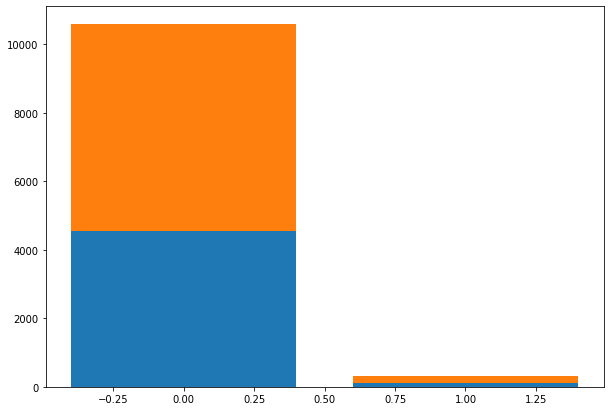

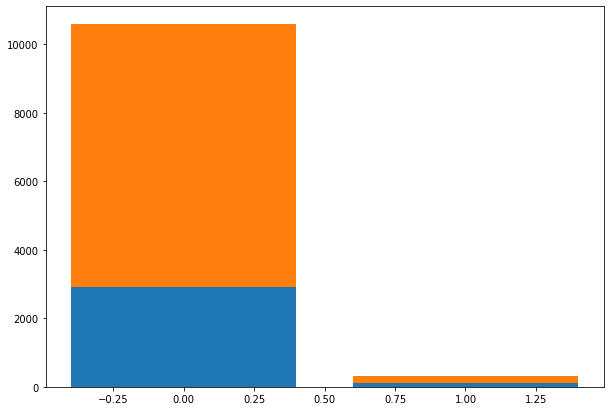

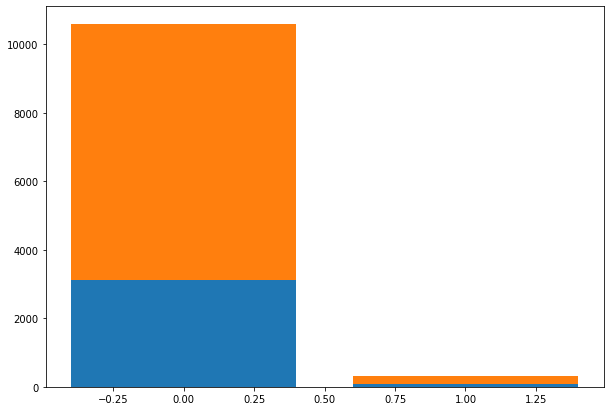

In [32]:
for i in range(3):
    fig, ax = plt.subplots(figsize = (10,7))
    

    holiday_num_for_cluster = np.array([len(df[(df.cluster_id_3==i)&(df.holiday == el)]) for el in holiday_unique])

    holiday_num = np.array([len(df[df.holiday==el]) for el in holiday_unique])

    ax.bar(holiday_unique, holiday_num_for_cluster, label='for cluster')
    ax.bar(holiday_unique, holiday_num-holiday_num_for_cluster, bottom=holiday_num_for_cluster, label='general')
    
    for j, el in enumerate(holiday_unique):
        print("{} of {} ({}) belong to {}-th class".format(holiday_num_for_cluster[j], holiday_num[j], 
                                                           round(holiday_num_for_cluster[j]/holiday_num[j],2), i))
    print()

2220 of 10575 (0.21) belong to 0-th class
79 of 311 (0.25) belong to 0-th class

2687 of 10575 (0.25) belong to 1-th class
66 of 311 (0.21) belong to 1-th class

2641 of 10575 (0.25) belong to 2-th class
78 of 311 (0.25) belong to 2-th class

3027 of 10575 (0.29) belong to 3-th class
88 of 311 (0.28) belong to 3-th class



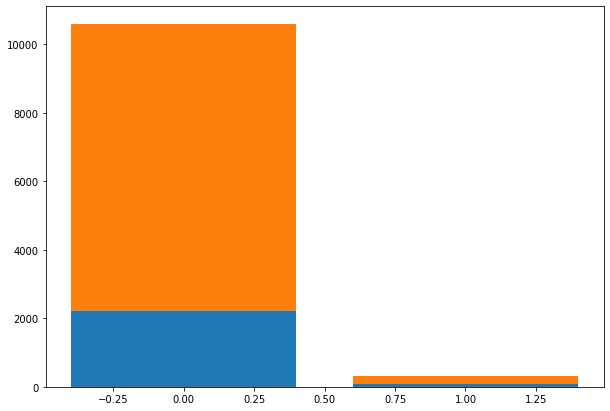

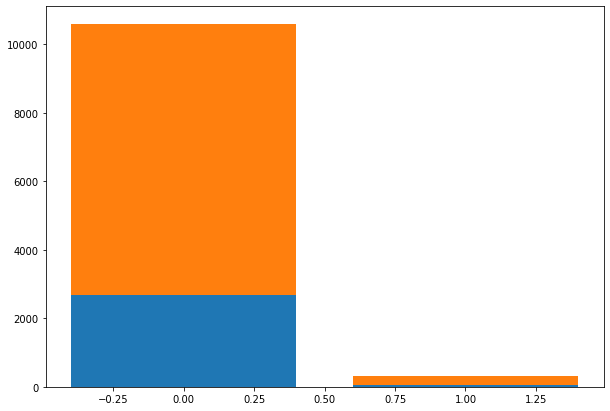

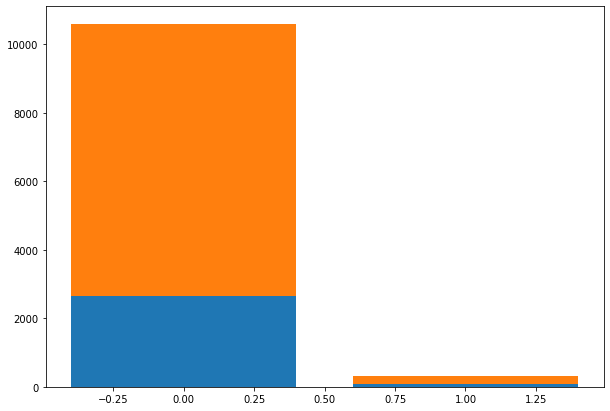

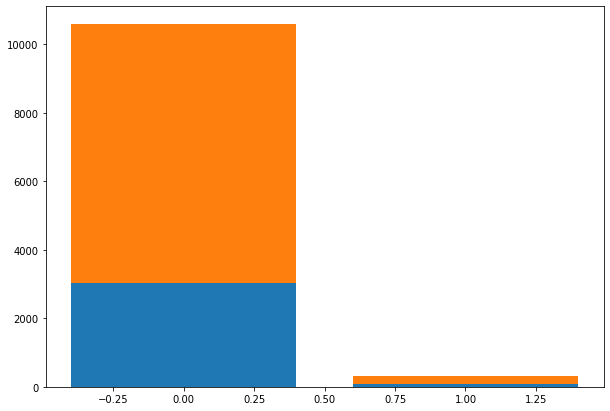

In [33]:
for i in range(4):
    fig, ax = plt.subplots(figsize = (10,7))
    

    holiday_num_for_cluster = np.array([len(df[(df.cluster_id_4==i)&(df.holiday == el)]) for el in holiday_unique])

    holiday_num = np.array([len(df[df.holiday==el]) for el in holiday_unique])

    ax.bar(holiday_unique, holiday_num_for_cluster, label='for cluster')
    ax.bar(holiday_unique, holiday_num-holiday_num_for_cluster, bottom=holiday_num_for_cluster, label='general')
    
    for j, el in enumerate(holiday_unique):
        print("{} of {} ({}) belong to {}-th class".format(holiday_num_for_cluster[j], holiday_num[j], 
                                                           round(holiday_num_for_cluster[j]/holiday_num[j],2), i))
    print()

2830 of 10575 (0.27) belong to 0-th class
88 of 311 (0.28) belong to 0-th class

2068 of 10575 (0.2) belong to 1-th class
74 of 311 (0.24) belong to 1-th class

2355 of 10575 (0.22) belong to 2-th class
58 of 311 (0.19) belong to 2-th class

1281 of 10575 (0.12) belong to 3-th class
39 of 311 (0.13) belong to 3-th class

2041 of 10575 (0.19) belong to 4-th class
52 of 311 (0.17) belong to 4-th class



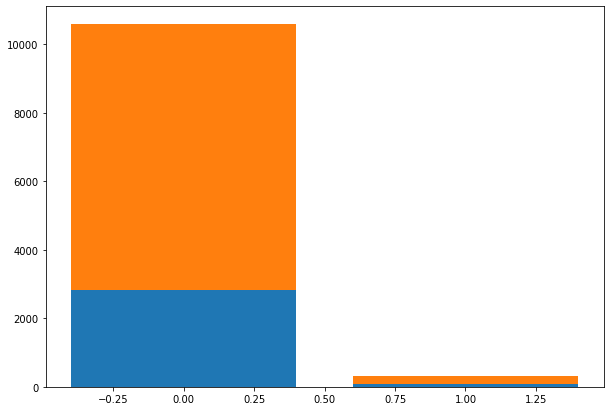

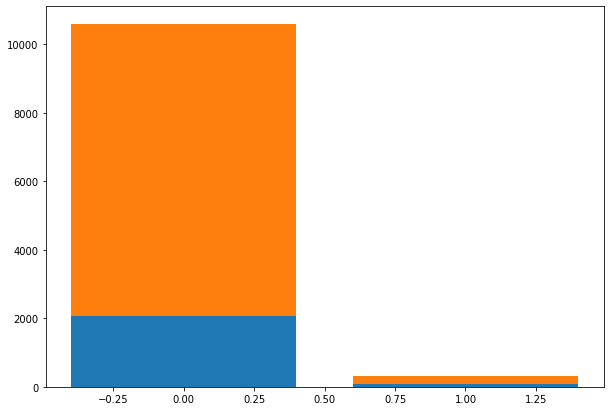

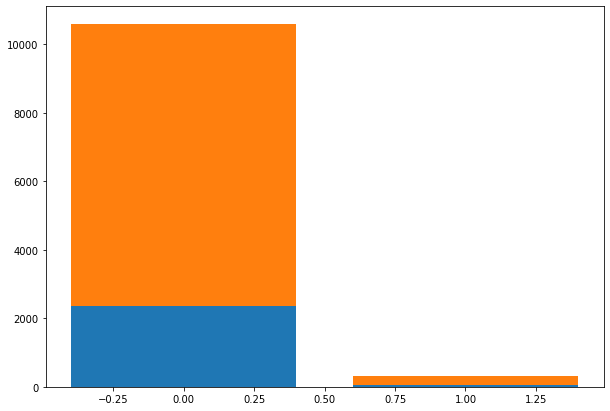

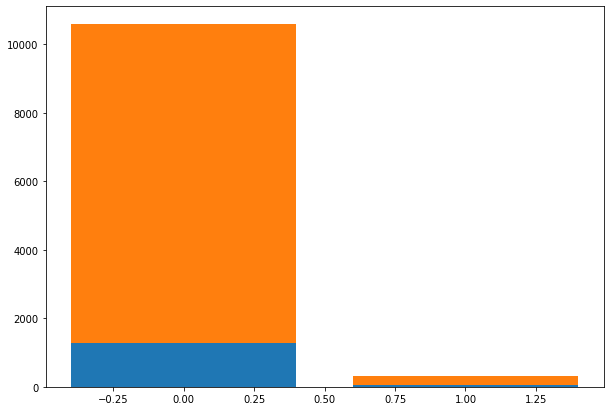

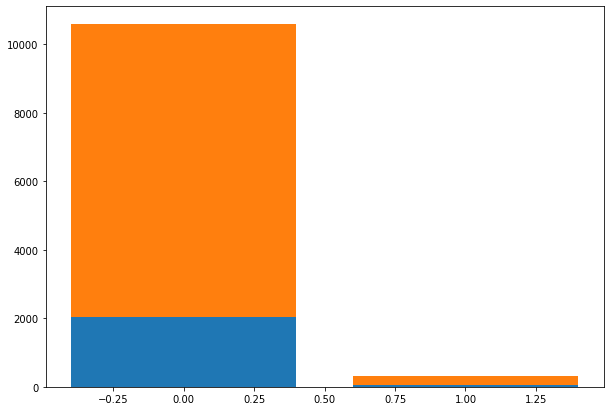

In [34]:
for i in range(5):
    fig, ax = plt.subplots(figsize = (10,7))
    

    holiday_num_for_cluster = np.array([len(df[(df.cluster_id_5==i)&(df.holiday == el)]) for el in holiday_unique])

    holiday_num = np.array([len(df[df.holiday==el]) for el in holiday_unique])

    ax.bar(holiday_unique, holiday_num_for_cluster, label='for cluster')
    ax.bar(holiday_unique, holiday_num-holiday_num_for_cluster, bottom=holiday_num_for_cluster, label='general')
    
    for j, el in enumerate(holiday_unique):
        print("{} of {} ({}) belong to {}-th class".format(holiday_num_for_cluster[j], holiday_num[j], 
                                                           round(holiday_num_for_cluster[j]/holiday_num[j],2), i))
    print()

1822 of 10575 (0.17) belong to 0-th class
47 of 311 (0.15) belong to 0-th class

1194 of 10575 (0.11) belong to 1-th class
37 of 311 (0.12) belong to 1-th class

1193 of 10575 (0.11) belong to 2-th class
40 of 311 (0.13) belong to 2-th class

2470 of 10575 (0.23) belong to 3-th class
77 of 311 (0.25) belong to 3-th class

1986 of 10575 (0.19) belong to 4-th class
69 of 311 (0.22) belong to 4-th class

1910 of 10575 (0.18) belong to 5-th class
41 of 311 (0.13) belong to 5-th class



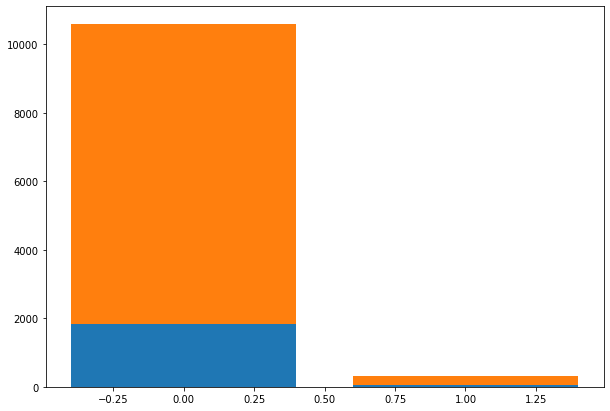

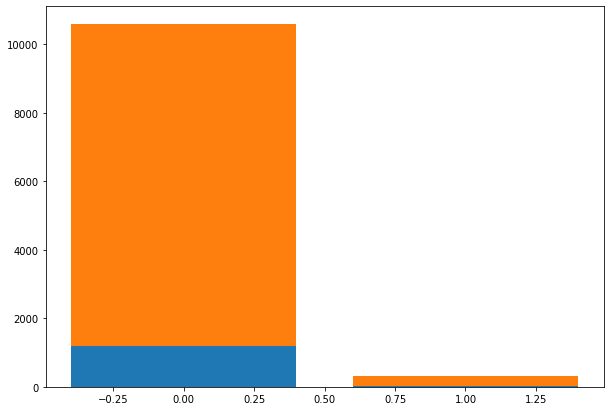

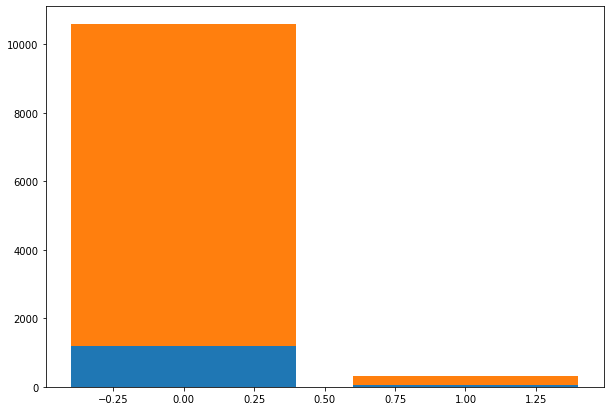

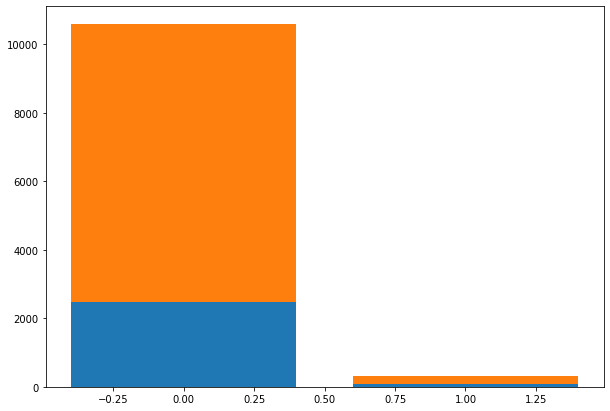

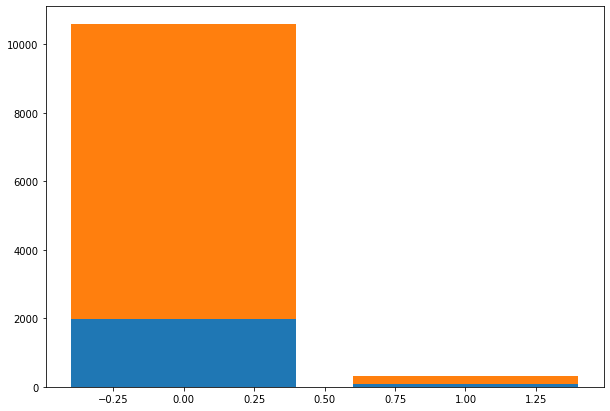

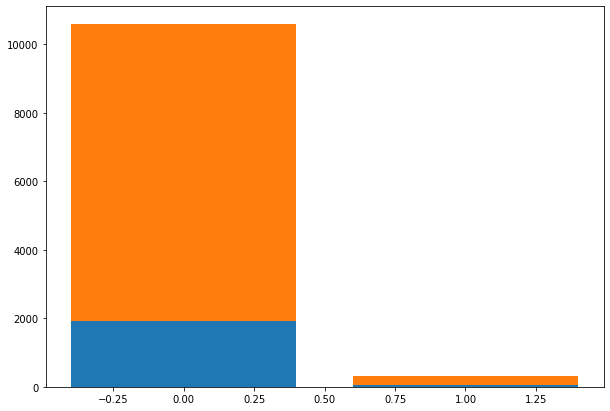

In [35]:
for i in range(6):
    fig, ax = plt.subplots(figsize = (10,7))
    

    holiday_num_for_cluster = np.array([len(df[(df.cluster_id_6==i)&(df.holiday == el)]) for el in holiday_unique])

    holiday_num = np.array([len(df[df.holiday==el]) for el in holiday_unique])

    ax.bar(holiday_unique, holiday_num_for_cluster, label='for cluster')
    ax.bar(holiday_unique, holiday_num-holiday_num_for_cluster, bottom=holiday_num_for_cluster, label='general')
    
    for j, el in enumerate(holiday_unique):
        print("{} of {} ({}) belong to {}-th class".format(holiday_num_for_cluster[j], holiday_num[j], 
                                                           round(holiday_num_for_cluster[j]/holiday_num[j],2), i))
    print()

1813 of 10575 (0.17) belong to 0-th class
60 of 311 (0.19) belong to 0-th class

1037 of 10575 (0.1) belong to 1-th class
34 of 311 (0.11) belong to 1-th class

1725 of 10575 (0.16) belong to 2-th class
43 of 311 (0.14) belong to 2-th class

1132 of 10575 (0.11) belong to 3-th class
34 of 311 (0.11) belong to 3-th class

1891 of 10575 (0.18) belong to 4-th class
68 of 311 (0.22) belong to 4-th class

1324 of 10575 (0.13) belong to 5-th class
36 of 311 (0.12) belong to 5-th class

1653 of 10575 (0.16) belong to 6-th class
36 of 311 (0.12) belong to 6-th class



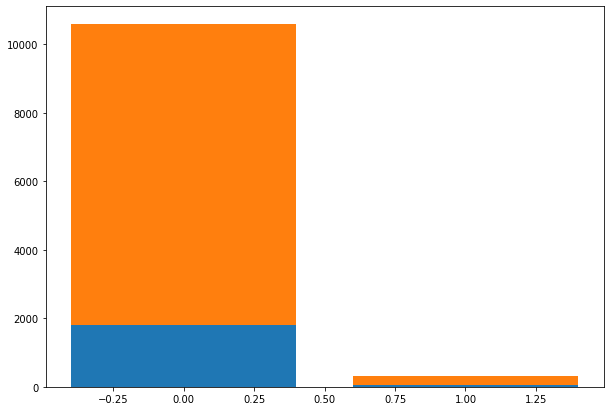

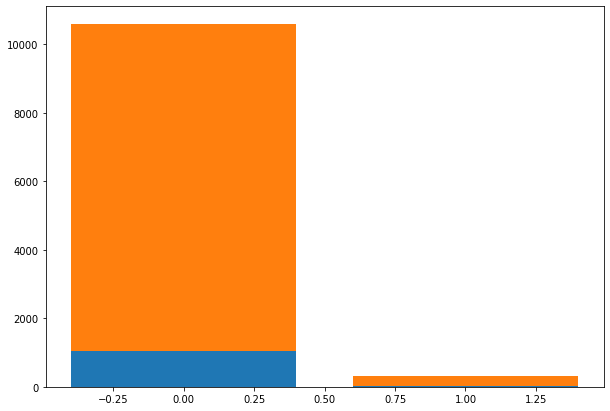

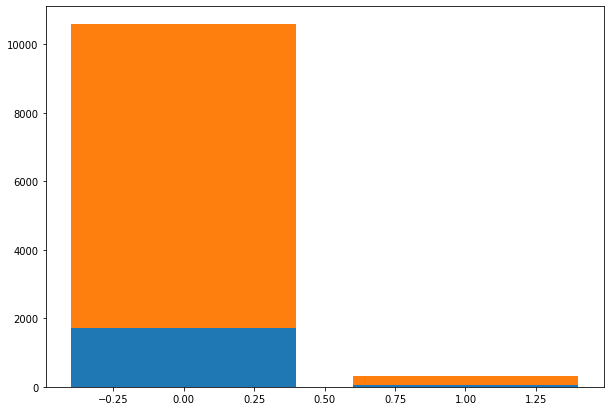

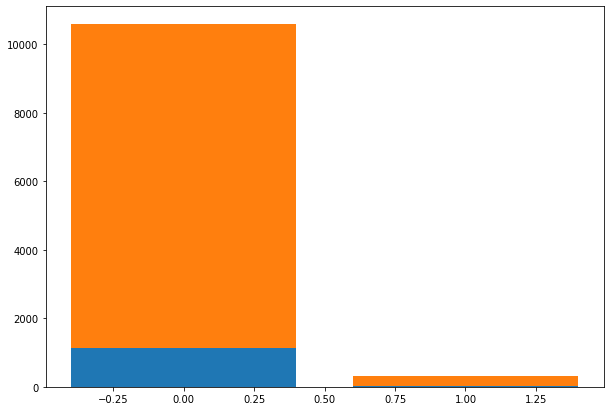

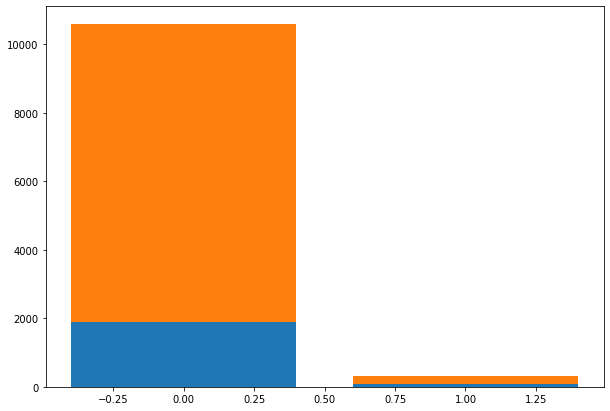

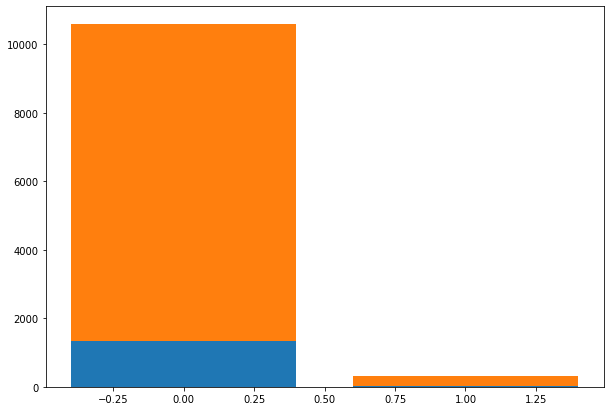

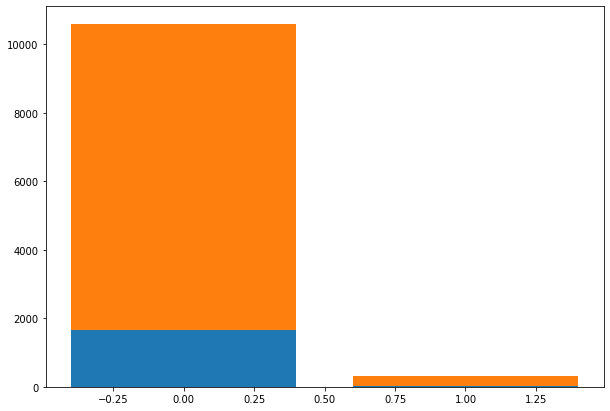

In [36]:
for i in range(7):
    fig, ax = plt.subplots(figsize = (10,7))
    

    holiday_num_for_cluster = np.array([len(df[(df.cluster_id_7==i)&(df.holiday == el)]) for el in holiday_unique])

    holiday_num = np.array([len(df[df.holiday==el]) for el in holiday_unique])

    ax.bar(holiday_unique, holiday_num_for_cluster, label='for cluster')
    ax.bar(holiday_unique, holiday_num-holiday_num_for_cluster, bottom=holiday_num_for_cluster, label='general')
    
    for j, el in enumerate(holiday_unique):
        print("{} of {} ({}) belong to {}-th class".format(holiday_num_for_cluster[j], holiday_num[j], 
                                                           round(holiday_num_for_cluster[j]/holiday_num[j],2), i))
    print()

4195 of 10575 (0.4) belong to 0-th class
123 of 311 (0.4) belong to 0-th class

6380 of 10575 (0.6) belong to 1-th class
188 of 311 (0.6) belong to 1-th class



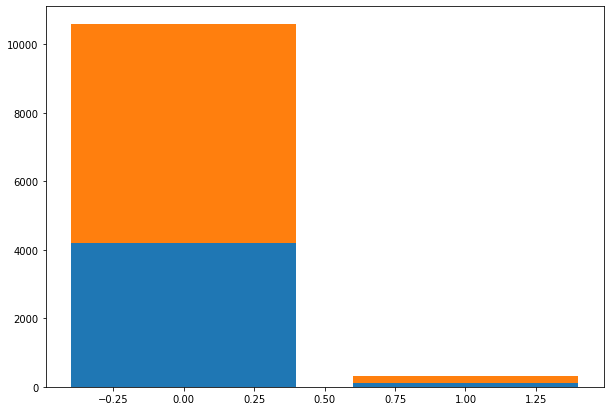

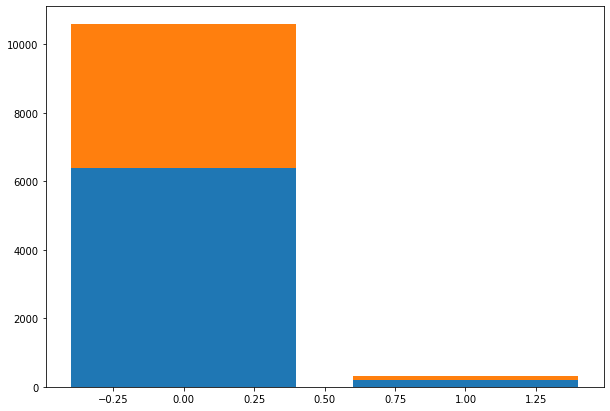

In [37]:
for i in range(2):
    fig, ax = plt.subplots(figsize = (10,7))
    

    holiday_num_for_cluster = np.array([len(df[(df.cluster_id_2==i)&(df.holiday == el)]) for el in holiday_unique])

    holiday_num = np.array([len(df[df.holiday==el]) for el in holiday_unique])

    ax.bar(holiday_unique, holiday_num_for_cluster, label='for cluster')
    ax.bar(holiday_unique, holiday_num-holiday_num_for_cluster, bottom=holiday_num_for_cluster, label='general')
    
    for j, el in enumerate(holiday_unique):
        print("{} of {} ({}) belong to {}-th class".format(holiday_num_for_cluster[j], holiday_num[j], 
                                                           round(holiday_num_for_cluster[j]/holiday_num[j],2), i))
    print()

819 of 10575 (0.08) belong to 0-th class
17 of 311 (0.05) belong to 0-th class

1237 of 10575 (0.12) belong to 1-th class
33 of 311 (0.11) belong to 1-th class

1554 of 10575 (0.15) belong to 2-th class
35 of 311 (0.11) belong to 2-th class

1001 of 10575 (0.09) belong to 3-th class
33 of 311 (0.11) belong to 3-th class

1656 of 10575 (0.16) belong to 4-th class
51 of 311 (0.16) belong to 4-th class

928 of 10575 (0.09) belong to 5-th class
43 of 311 (0.14) belong to 5-th class

1818 of 10575 (0.17) belong to 6-th class
65 of 311 (0.21) belong to 6-th class

1562 of 10575 (0.15) belong to 7-th class
34 of 311 (0.11) belong to 7-th class



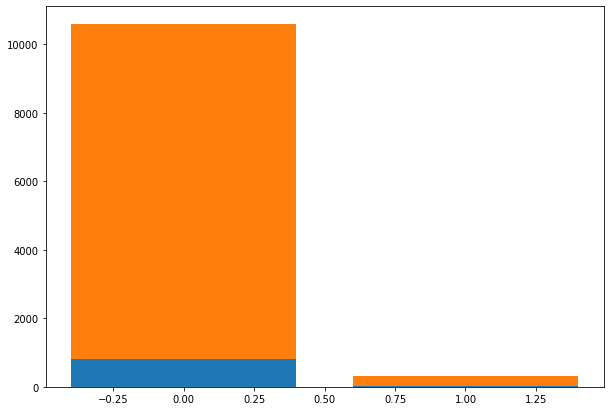

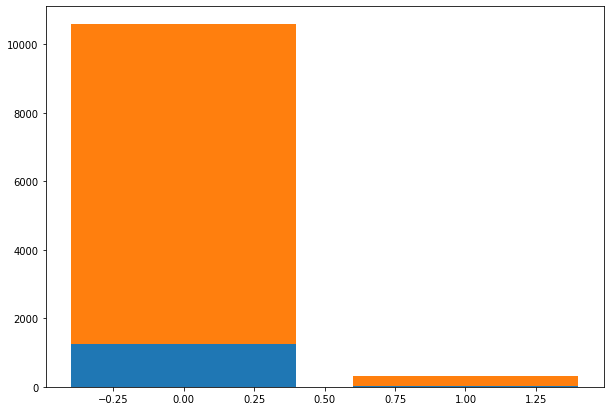

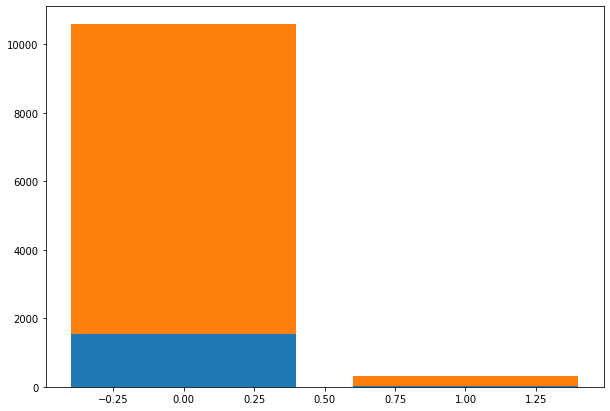

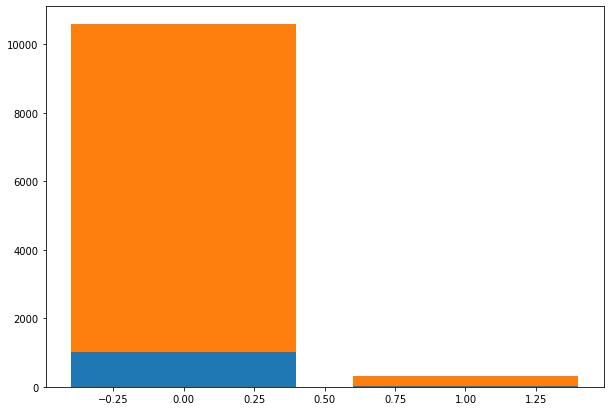

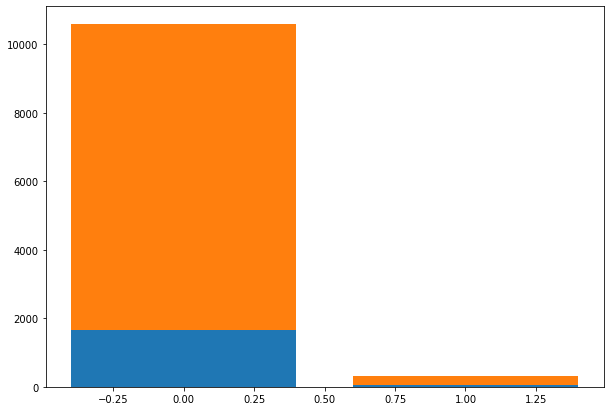

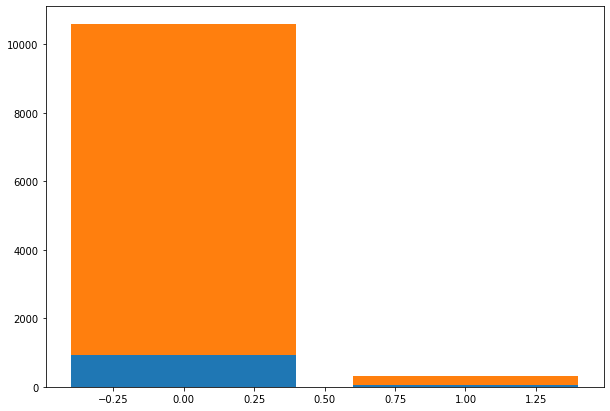

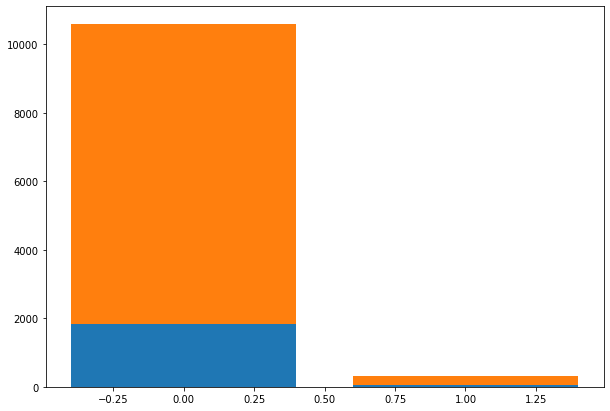

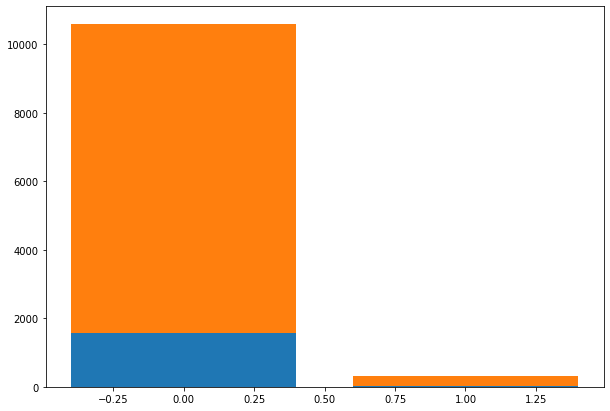

In [38]:
for i in range(8):
    fig, ax = plt.subplots(figsize = (10,7))
    

    holiday_num_for_cluster = np.array([len(df[(df.cluster_id_8==i)&(df.holiday == el)]) for el in holiday_unique])

    holiday_num = np.array([len(df[df.holiday==el]) for el in holiday_unique])

    ax.bar(holiday_unique, holiday_num_for_cluster, label='for cluster')
    ax.bar(holiday_unique, holiday_num-holiday_num_for_cluster, bottom=holiday_num_for_cluster, label='general')
    
    for j, el in enumerate(holiday_unique):
        print("{} of {} ({}) belong to {}-th class".format(holiday_num_for_cluster[j], holiday_num[j], 
                                                           round(holiday_num_for_cluster[j]/holiday_num[j],2), i))
    print()

1478 of 10575 (0.14) belong to 0-th class
41 of 311 (0.13) belong to 0-th class

1579 of 10575 (0.15) belong to 1-th class
50 of 311 (0.16) belong to 1-th class

721 of 10575 (0.07) belong to 2-th class
13 of 311 (0.04) belong to 2-th class

760 of 10575 (0.07) belong to 3-th class
12 of 311 (0.04) belong to 3-th class

1231 of 10575 (0.12) belong to 4-th class
32 of 311 (0.1) belong to 4-th class

889 of 10575 (0.08) belong to 5-th class
43 of 311 (0.14) belong to 5-th class

1429 of 10575 (0.14) belong to 6-th class
36 of 311 (0.12) belong to 6-th class

1417 of 10575 (0.13) belong to 7-th class
34 of 311 (0.11) belong to 7-th class

1071 of 10575 (0.1) belong to 8-th class
50 of 311 (0.16) belong to 8-th class



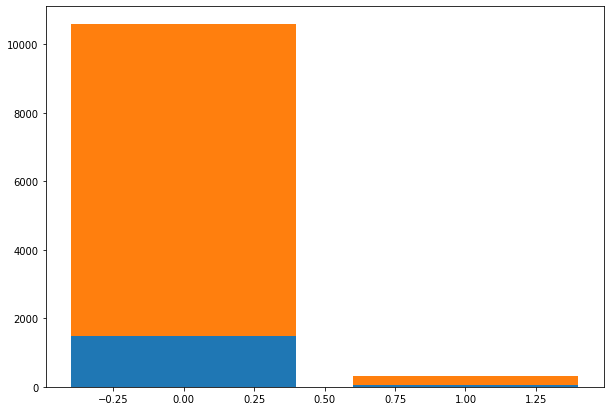

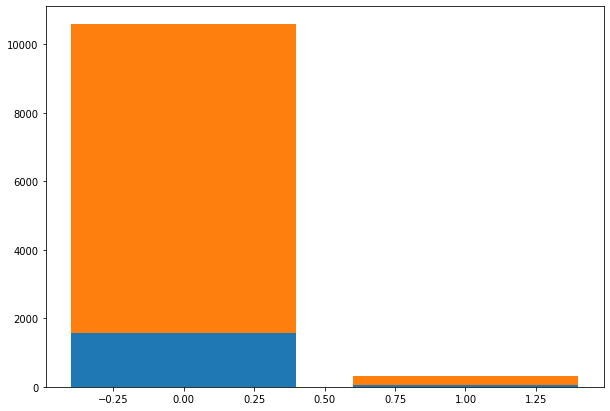

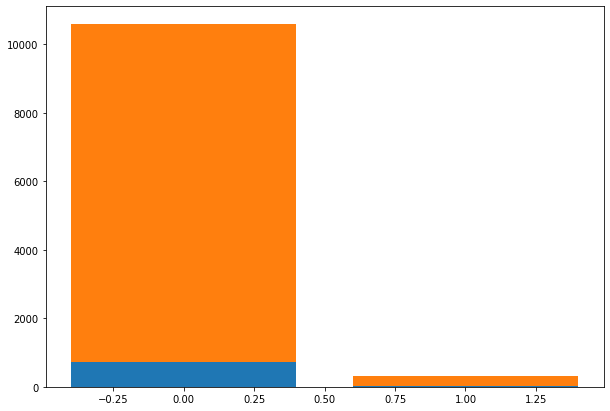

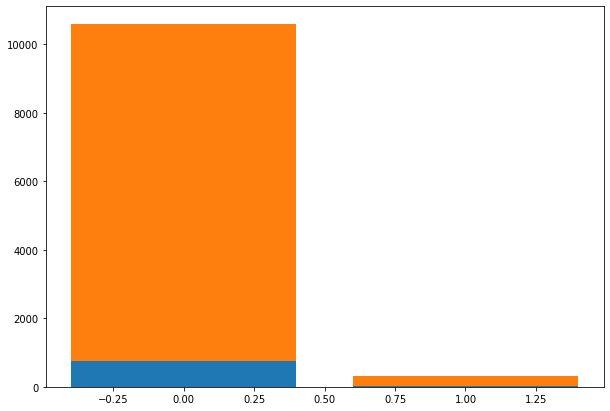

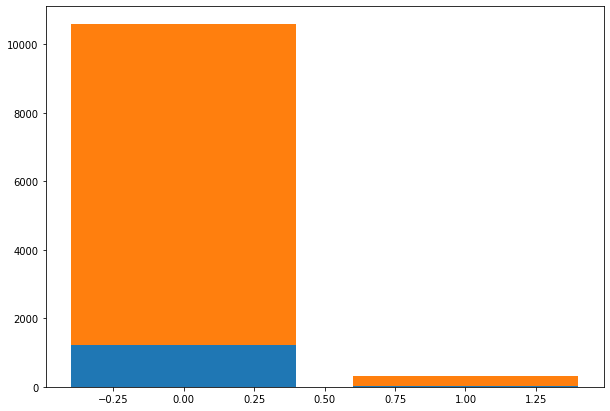

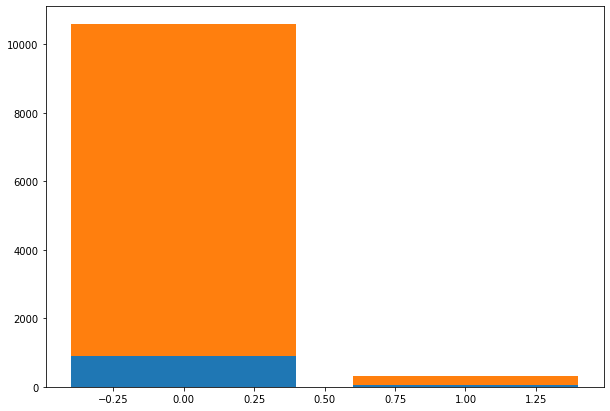

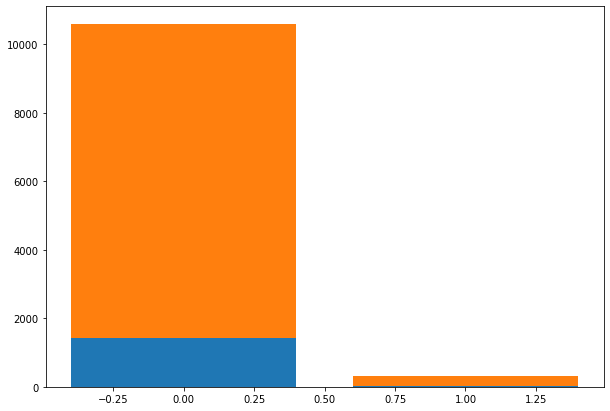

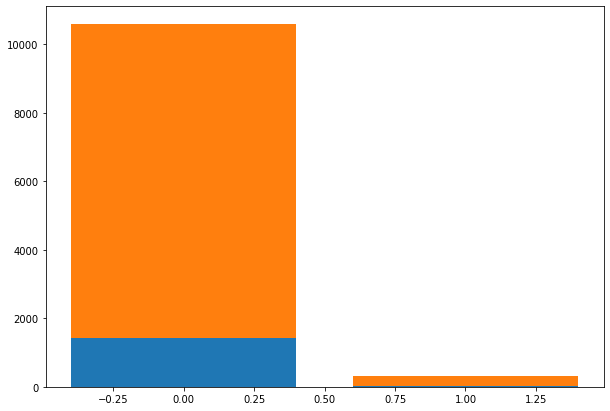

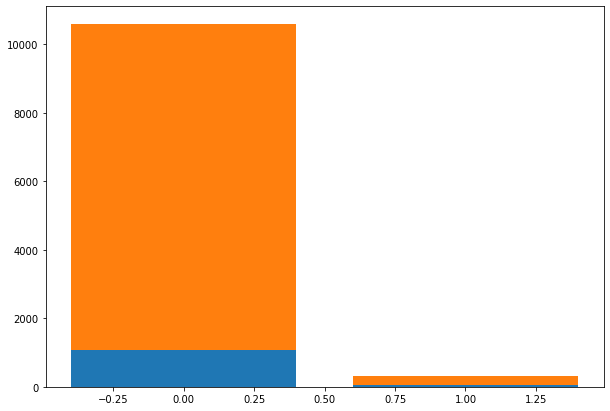

In [39]:
for i in range(9):
    fig, ax = plt.subplots(figsize = (10,7))
    

    holiday_num_for_cluster = np.array([len(df[(df.cluster_id_9==i)&(df.holiday == el)]) for el in holiday_unique])

    holiday_num = np.array([len(df[df.holiday==el]) for el in holiday_unique])

    ax.bar(holiday_unique, holiday_num_for_cluster, label='for cluster')
    ax.bar(holiday_unique, holiday_num-holiday_num_for_cluster, bottom=holiday_num_for_cluster, label='general')
    
    for j, el in enumerate(holiday_unique):
        print("{} of {} ({}) belong to {}-th class".format(holiday_num_for_cluster[j], holiday_num[j], 
                                                           round(holiday_num_for_cluster[j]/holiday_num[j],2), i))
    print()

# Workingday

1293 of 3474 (0.37) belong to 0-th class
3025 of 7412 (0.41) belong to 0-th class

2181 of 3474 (0.63) belong to 1-th class
4387 of 7412 (0.59) belong to 1-th class



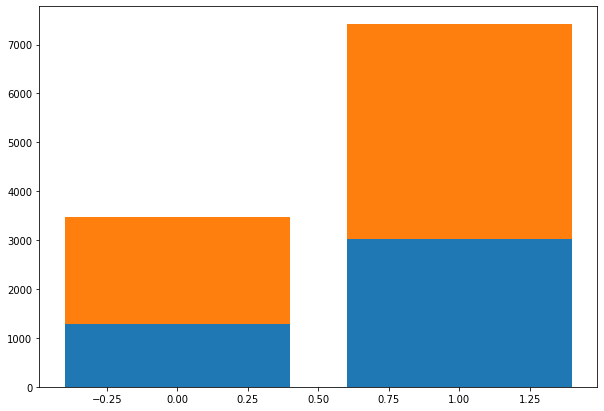

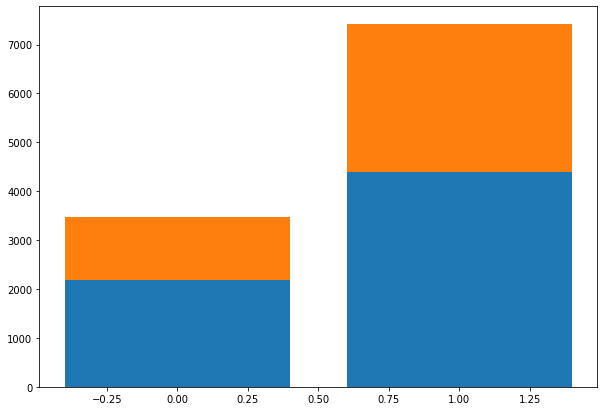

In [40]:
for i in range(2):
    fig, ax = plt.subplots(figsize = (10,7))
    

    workingday_num_for_cluster = np.array([len(df[(df.cluster_id_2==i)&(df.workingday == el)]) for el in workingday_unique])

    workingday_num = np.array([len(df[df.workingday==el]) for el in workingday_unique])

    ax.bar(workingday_unique, workingday_num_for_cluster, label='for cluster')
    ax.bar(workingday_unique, workingday_num-workingday_num_for_cluster, bottom=workingday_num_for_cluster, label='general')
    
    for j, el in enumerate(workingday_unique):
        print("{} of {} ({}) belong to {}-th class".format(workingday_num_for_cluster[j], workingday_num[j], 
                                                           round(workingday_num_for_cluster[j]/workingday_num[j],2), i))
    print()

1589 of 3474 (0.46) belong to 0-th class
3081 of 7412 (0.42) belong to 0-th class

922 of 3474 (0.27) belong to 1-th class
2090 of 7412 (0.28) belong to 1-th class

963 of 3474 (0.28) belong to 2-th class
2241 of 7412 (0.3) belong to 2-th class



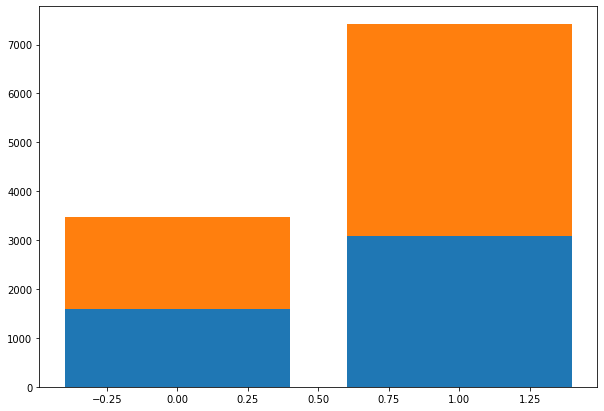

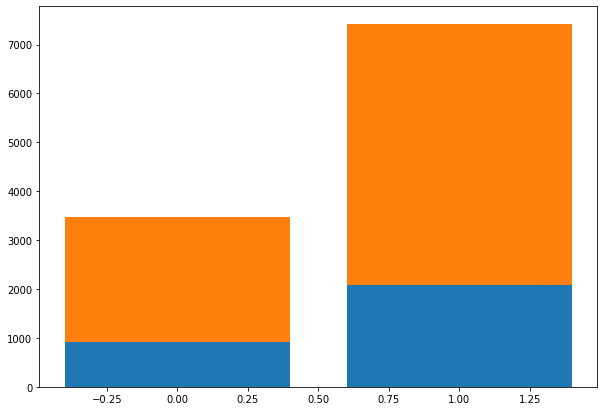

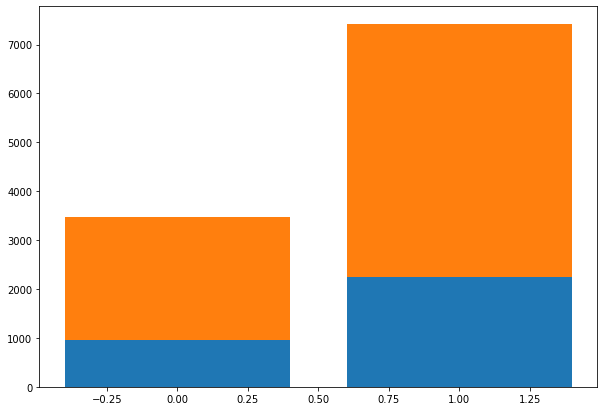

In [41]:
for i in range(3):
    fig, ax = plt.subplots(figsize = (10,7))
    

    workingday_num_for_cluster = np.array([len(df[(df.cluster_id_3==i)&(df.workingday == el)]) for el in workingday_unique])

    workingday_num = np.array([len(df[df.workingday==el]) for el in workingday_unique])

    ax.bar(workingday_unique, workingday_num_for_cluster, label='for cluster')
    ax.bar(workingday_unique, workingday_num-workingday_num_for_cluster, bottom=workingday_num_for_cluster, label='general')
    
    for j, el in enumerate(workingday_unique):
        print("{} of {} ({}) belong to {}-th class".format(workingday_num_for_cluster[j], workingday_num[j], 
                                                           round(workingday_num_for_cluster[j]/workingday_num[j],2), i))
    print()

696 of 3474 (0.2) belong to 0-th class
1603 of 7412 (0.22) belong to 0-th class

1004 of 3474 (0.29) belong to 1-th class
1749 of 7412 (0.24) belong to 1-th class

837 of 3474 (0.24) belong to 2-th class
1882 of 7412 (0.25) belong to 2-th class

937 of 3474 (0.27) belong to 3-th class
2178 of 7412 (0.29) belong to 3-th class



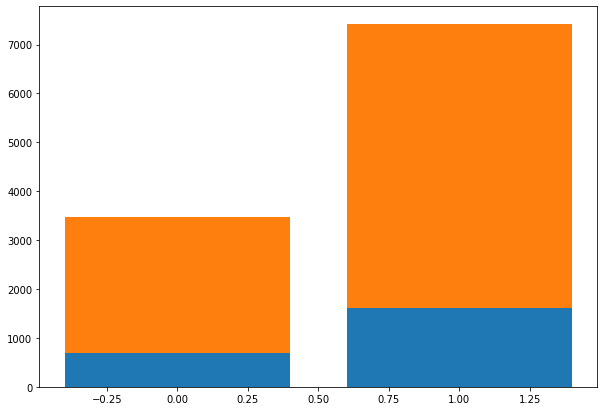

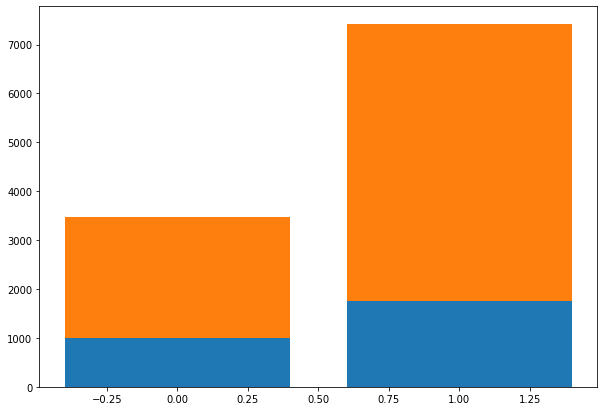

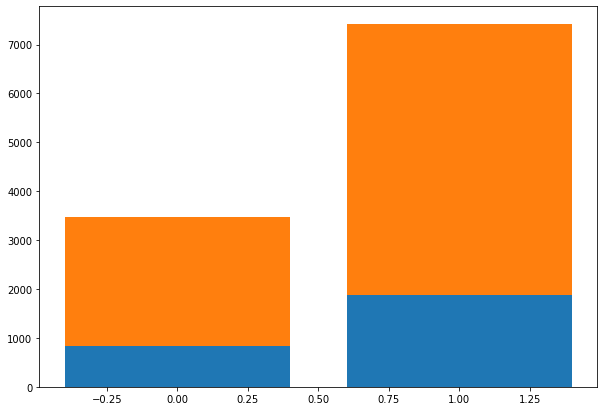

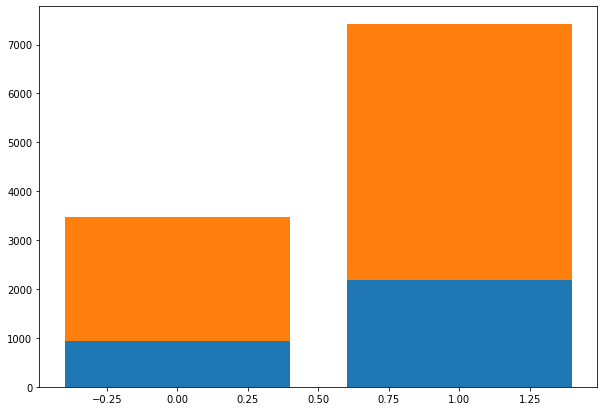

In [42]:
for i in range(4):
    fig, ax = plt.subplots(figsize = (10,7))
    

    workingday_num_for_cluster = np.array([len(df[(df.cluster_id_4==i)&(df.workingday == el)]) for el in workingday_unique])

    workingday_num = np.array([len(df[df.workingday==el]) for el in workingday_unique])

    ax.bar(workingday_unique, workingday_num_for_cluster, label='for cluster')
    ax.bar(workingday_unique, workingday_num-workingday_num_for_cluster, bottom=workingday_num_for_cluster, label='general')
    
    for j, el in enumerate(workingday_unique):
        print("{} of {} ({}) belong to {}-th class".format(workingday_num_for_cluster[j], workingday_num[j], 
                                                           round(workingday_num_for_cluster[j]/workingday_num[j],2), i))
    print()

959 of 3474 (0.28) belong to 0-th class
1959 of 7412 (0.26) belong to 0-th class

659 of 3474 (0.19) belong to 1-th class
1483 of 7412 (0.2) belong to 1-th class

838 of 3474 (0.24) belong to 2-th class
1575 of 7412 (0.21) belong to 2-th class

445 of 3474 (0.13) belong to 3-th class
875 of 7412 (0.12) belong to 3-th class

573 of 3474 (0.16) belong to 4-th class
1520 of 7412 (0.21) belong to 4-th class



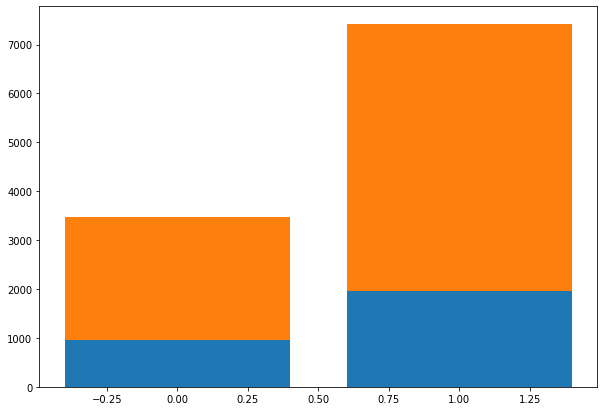

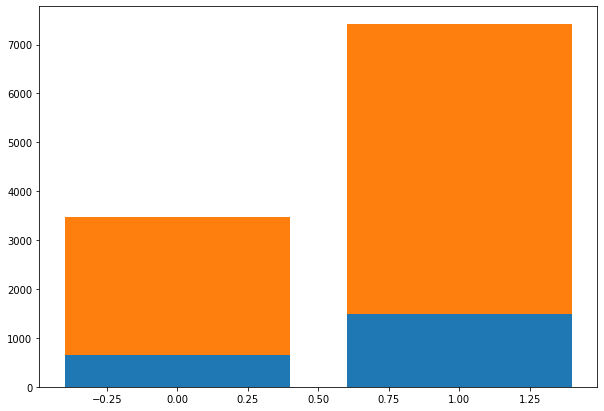

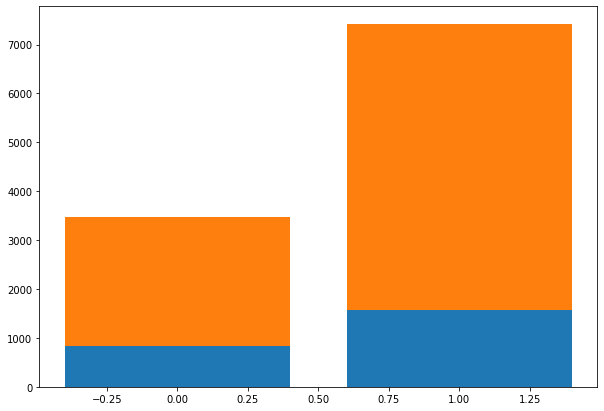

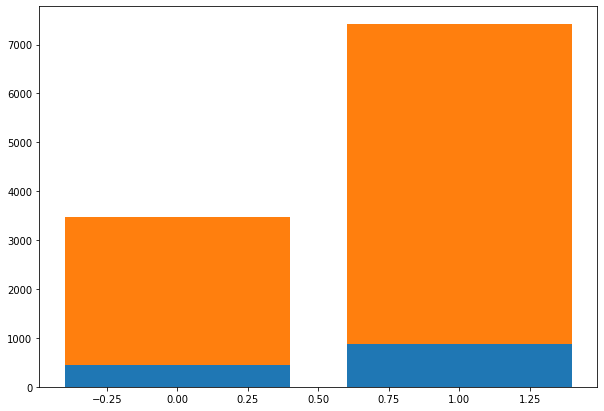

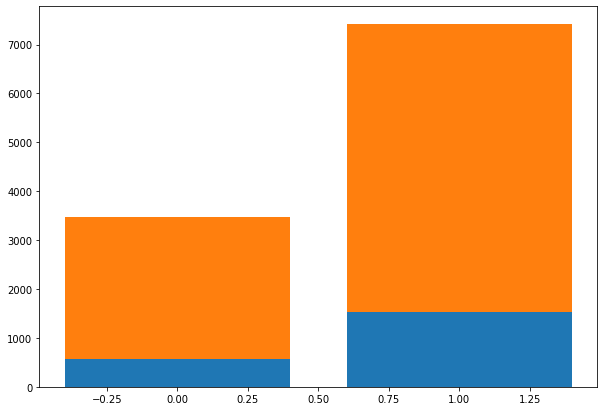

In [43]:
for i in range(5):
    fig, ax = plt.subplots(figsize = (10,7))
    

    workingday_num_for_cluster = np.array([len(df[(df.cluster_id_5==i)&(df.workingday == el)]) for el in workingday_unique])

    workingday_num = np.array([len(df[df.workingday==el]) for el in workingday_unique])

    ax.bar(workingday_unique, workingday_num_for_cluster, label='for cluster')
    ax.bar(workingday_unique, workingday_num-workingday_num_for_cluster, bottom=workingday_num_for_cluster, label='general')
    
    for j, el in enumerate(workingday_unique):
        print("{} of {} ({}) belong to {}-th class".format(workingday_num_for_cluster[j], workingday_num[j], 
                                                           round(workingday_num_for_cluster[j]/workingday_num[j],2), i))
    print()

511 of 3474 (0.15) belong to 0-th class
1358 of 7412 (0.18) belong to 0-th class

414 of 3474 (0.12) belong to 1-th class
817 of 7412 (0.11) belong to 1-th class

367 of 3474 (0.11) belong to 2-th class
866 of 7412 (0.12) belong to 2-th class

808 of 3474 (0.23) belong to 3-th class
1739 of 7412 (0.23) belong to 3-th class

666 of 3474 (0.19) belong to 4-th class
1389 of 7412 (0.19) belong to 4-th class

708 of 3474 (0.2) belong to 5-th class
1243 of 7412 (0.17) belong to 5-th class



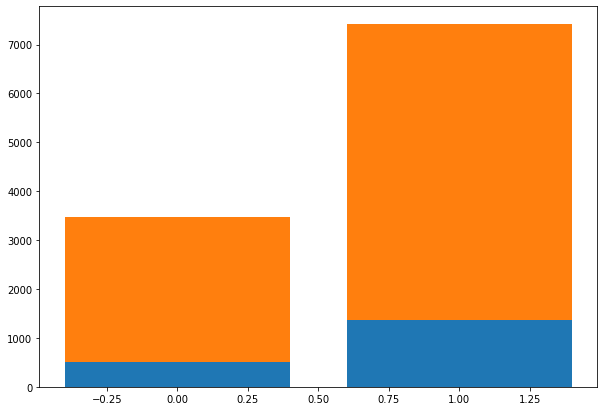

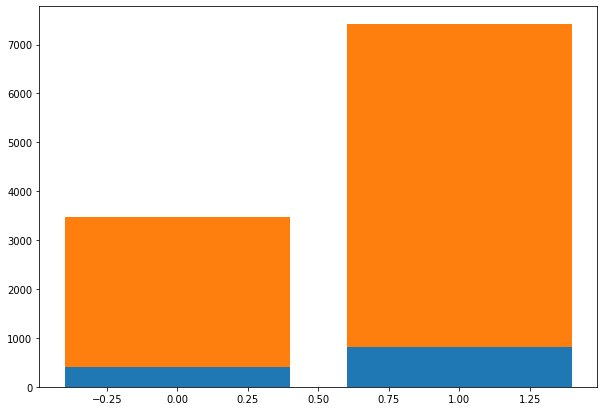

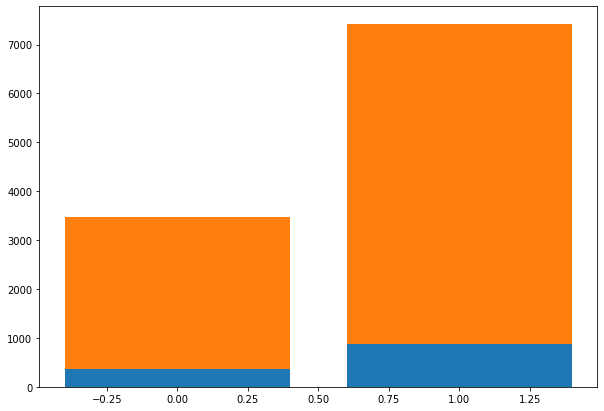

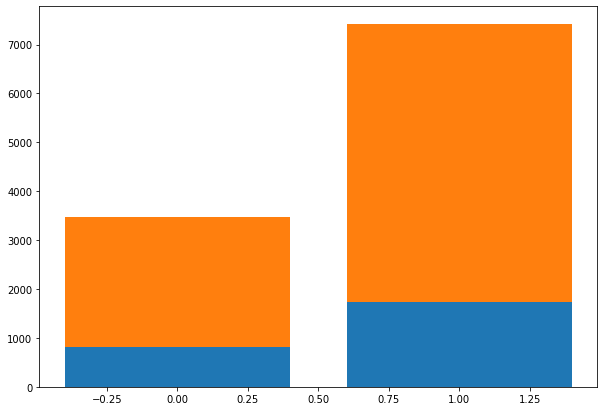

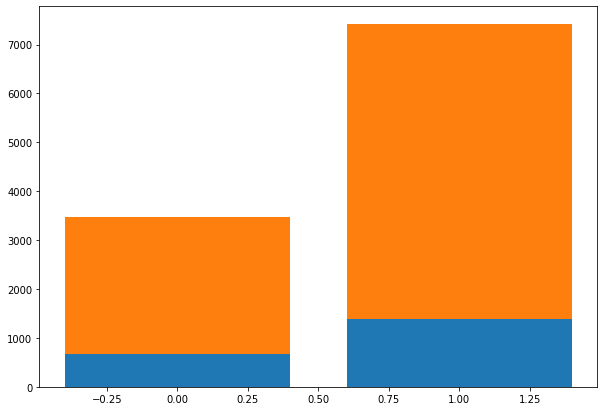

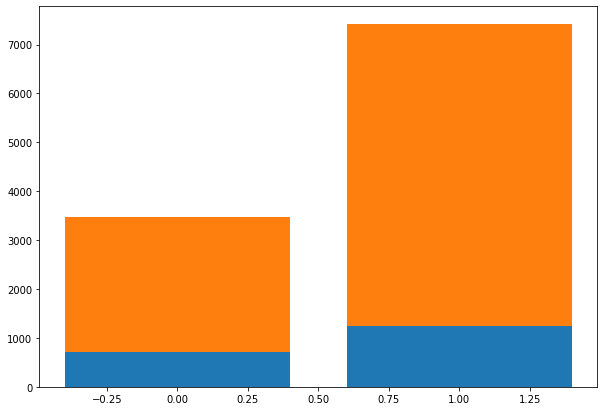

In [44]:
for i in range(6):
    fig, ax = plt.subplots(figsize = (10,7))
    

    workingday_num_for_cluster = np.array([len(df[(df.cluster_id_6==i)&(df.workingday == el)]) for el in workingday_unique])

    workingday_num = np.array([len(df[df.workingday==el]) for el in workingday_unique])

    ax.bar(workingday_unique, workingday_num_for_cluster, label='for cluster')
    ax.bar(workingday_unique, workingday_num-workingday_num_for_cluster, bottom=workingday_num_for_cluster, label='general')
    
    for j, el in enumerate(workingday_unique):
        print("{} of {} ({}) belong to {}-th class".format(workingday_num_for_cluster[j], workingday_num[j], 
                                                           round(workingday_num_for_cluster[j]/workingday_num[j],2), i))
    print()

601 of 3474 (0.17) belong to 0-th class
1272 of 7412 (0.17) belong to 0-th class

326 of 3474 (0.09) belong to 1-th class
745 of 7412 (0.1) belong to 1-th class

486 of 3474 (0.14) belong to 2-th class
1282 of 7412 (0.17) belong to 2-th class

383 of 3474 (0.11) belong to 3-th class
783 of 7412 (0.11) belong to 3-th class

651 of 3474 (0.19) belong to 4-th class
1308 of 7412 (0.18) belong to 4-th class

397 of 3474 (0.11) belong to 5-th class
963 of 7412 (0.13) belong to 5-th class

630 of 3474 (0.18) belong to 6-th class
1059 of 7412 (0.14) belong to 6-th class



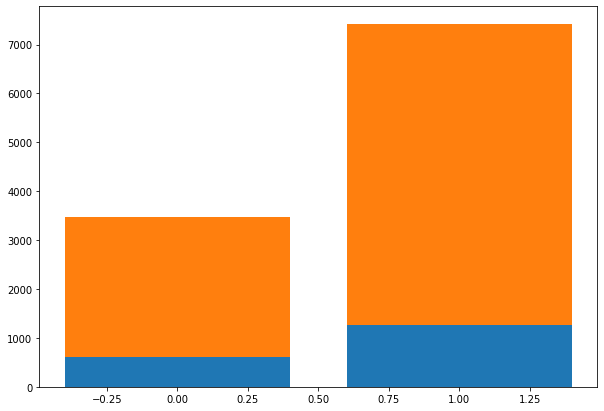

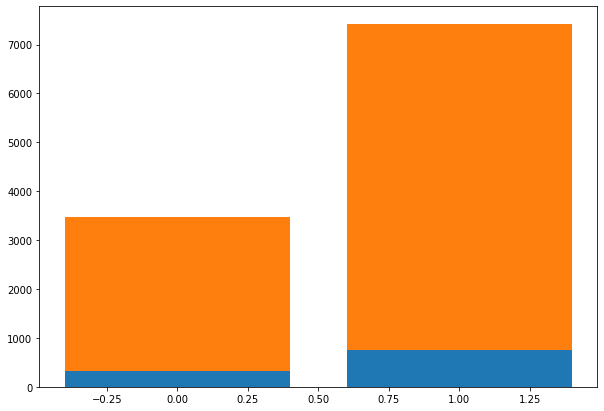

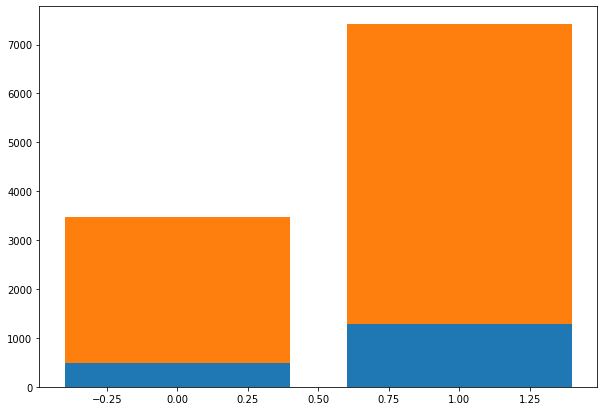

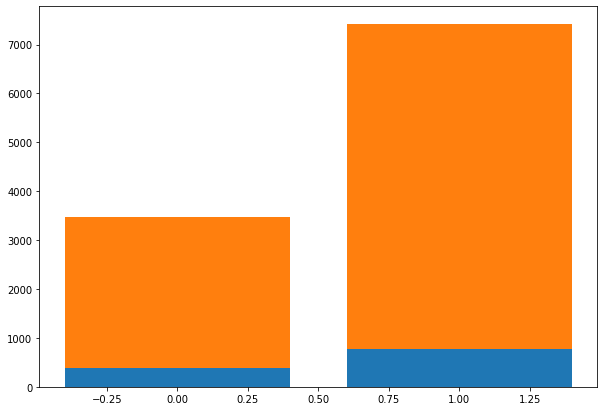

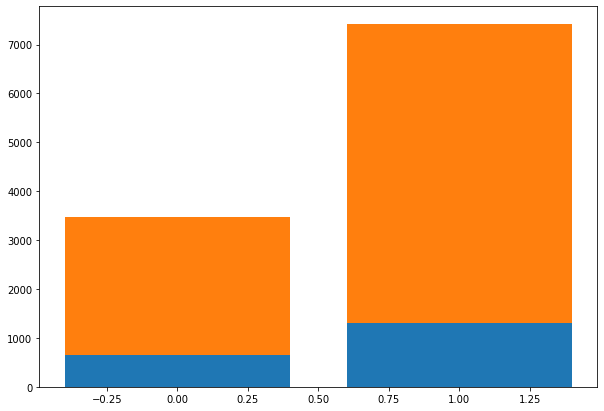

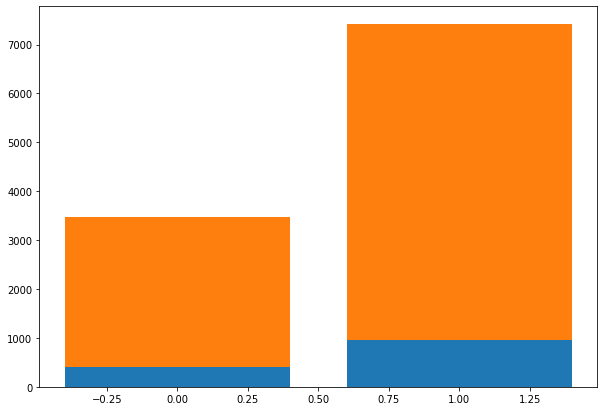

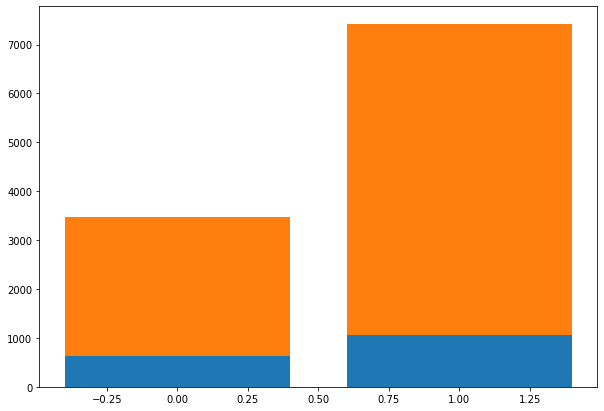

In [45]:
for i in range(7):
    fig, ax = plt.subplots(figsize = (10,7))
    

    workingday_num_for_cluster = np.array([len(df[(df.cluster_id_7==i)&(df.workingday == el)]) for el in workingday_unique])

    workingday_num = np.array([len(df[df.workingday==el]) for el in workingday_unique])

    ax.bar(workingday_unique, workingday_num_for_cluster, label='for cluster')
    ax.bar(workingday_unique, workingday_num-workingday_num_for_cluster, bottom=workingday_num_for_cluster, label='general')
    
    for j, el in enumerate(workingday_unique):
        print("{} of {} ({}) belong to {}-th class".format(workingday_num_for_cluster[j], workingday_num[j], 
                                                           round(workingday_num_for_cluster[j]/workingday_num[j],2), i))
    print()

319 of 3474 (0.09) belong to 0-th class
517 of 7412 (0.07) belong to 0-th class

368 of 3474 (0.11) belong to 1-th class
902 of 7412 (0.12) belong to 1-th class

404 of 3474 (0.12) belong to 2-th class
1185 of 7412 (0.16) belong to 2-th class

312 of 3474 (0.09) belong to 3-th class
722 of 7412 (0.1) belong to 3-th class

550 of 3474 (0.16) belong to 4-th class
1157 of 7412 (0.16) belong to 4-th class

295 of 3474 (0.08) belong to 5-th class
676 of 7412 (0.09) belong to 5-th class

626 of 3474 (0.18) belong to 6-th class
1257 of 7412 (0.17) belong to 6-th class

600 of 3474 (0.17) belong to 7-th class
996 of 7412 (0.13) belong to 7-th class



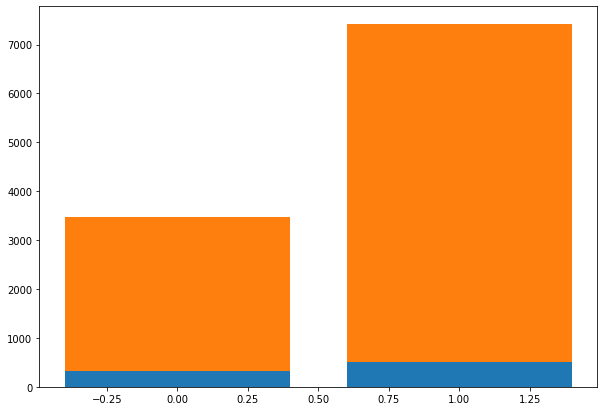

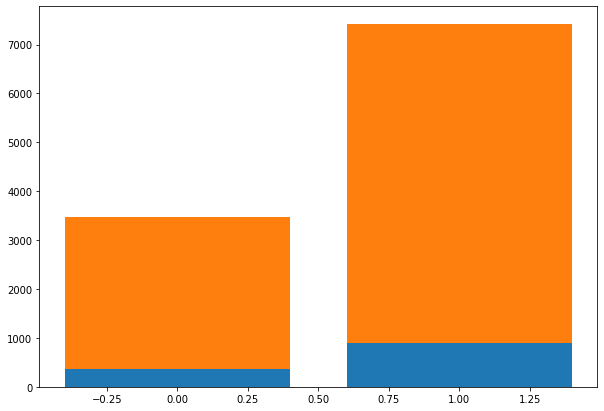

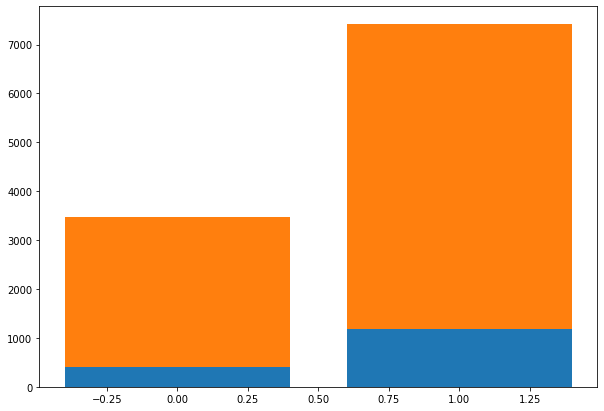

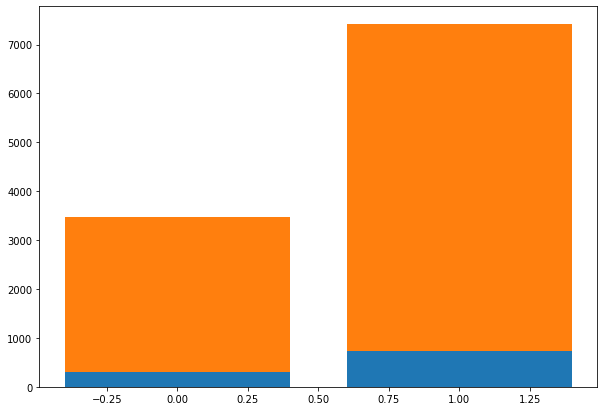

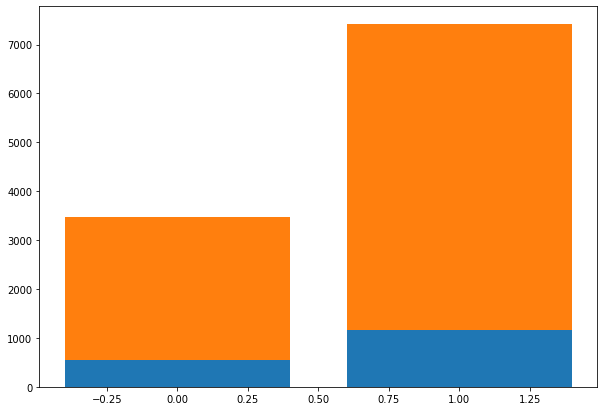

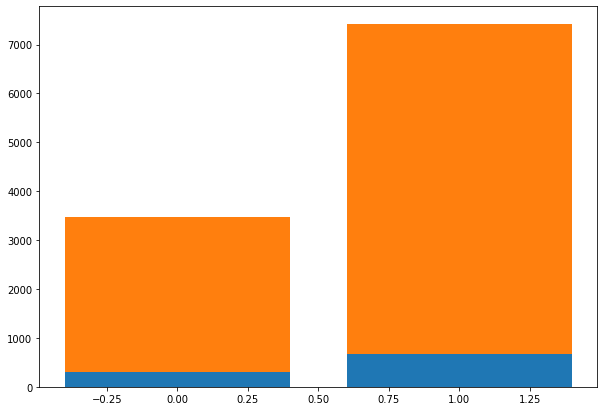

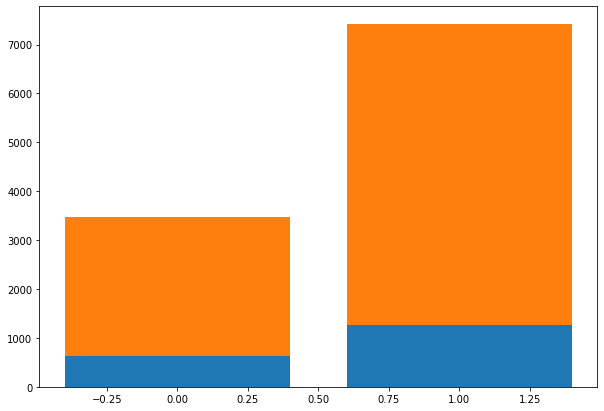

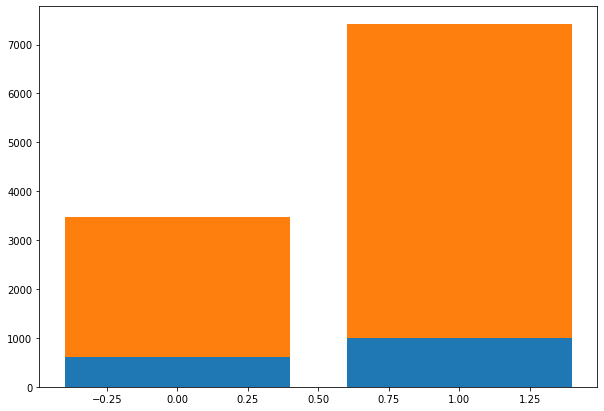

In [46]:
for i in range(8):
    fig, ax = plt.subplots(figsize = (10,7))
    

    workingday_num_for_cluster = np.array([len(df[(df.cluster_id_8==i)&(df.workingday == el)]) for el in workingday_unique])

    workingday_num = np.array([len(df[df.workingday==el]) for el in workingday_unique])

    ax.bar(workingday_unique, workingday_num_for_cluster, label='for cluster')
    ax.bar(workingday_unique, workingday_num-workingday_num_for_cluster, bottom=workingday_num_for_cluster, label='general')
    
    for j, el in enumerate(workingday_unique):
        print("{} of {} ({}) belong to {}-th class".format(workingday_num_for_cluster[j], workingday_num[j], 
                                                           round(workingday_num_for_cluster[j]/workingday_num[j],2), i))
    print()

477 of 3474 (0.14) belong to 0-th class
1042 of 7412 (0.14) belong to 0-th class

531 of 3474 (0.15) belong to 1-th class
1098 of 7412 (0.15) belong to 1-th class

264 of 3474 (0.08) belong to 2-th class
470 of 7412 (0.06) belong to 2-th class

219 of 3474 (0.06) belong to 3-th class
553 of 7412 (0.07) belong to 3-th class

364 of 3474 (0.1) belong to 4-th class
899 of 7412 (0.12) belong to 4-th class

289 of 3474 (0.08) belong to 5-th class
643 of 7412 (0.09) belong to 5-th class

389 of 3474 (0.11) belong to 6-th class
1076 of 7412 (0.15) belong to 6-th class

559 of 3474 (0.16) belong to 7-th class
892 of 7412 (0.12) belong to 7-th class

382 of 3474 (0.11) belong to 8-th class
739 of 7412 (0.1) belong to 8-th class



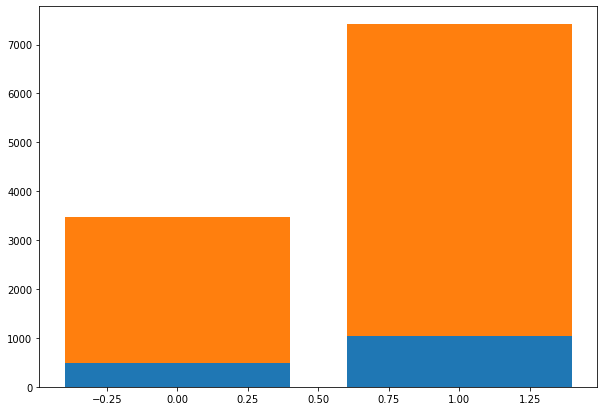

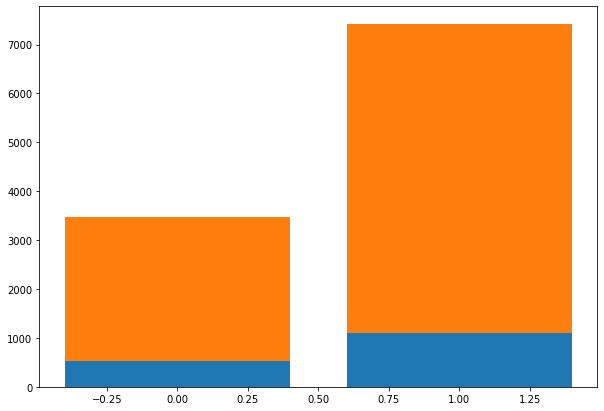

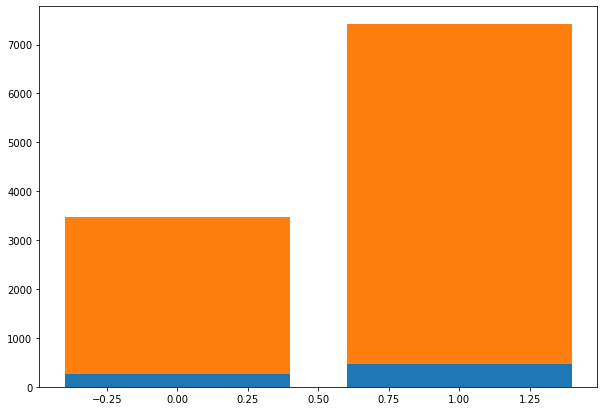

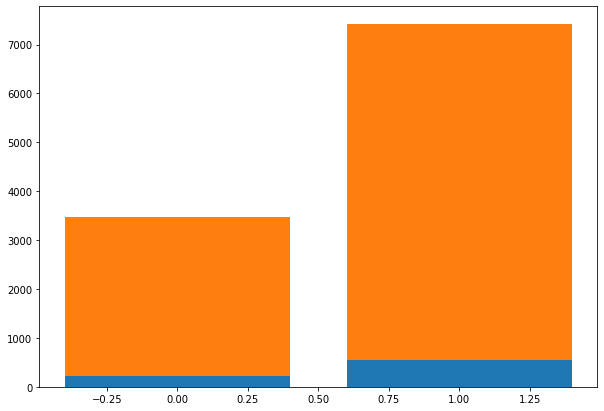

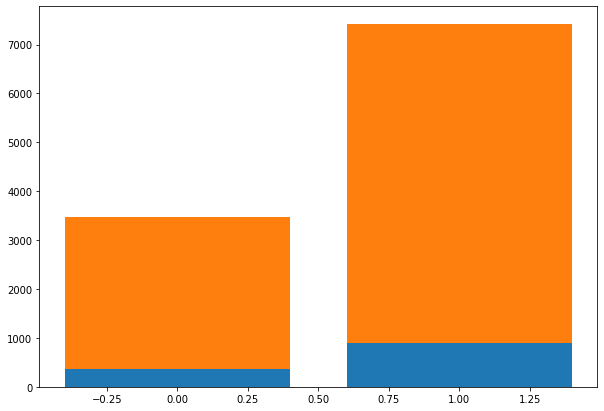

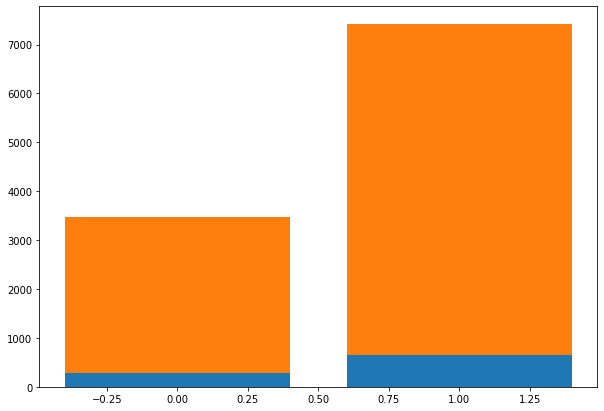

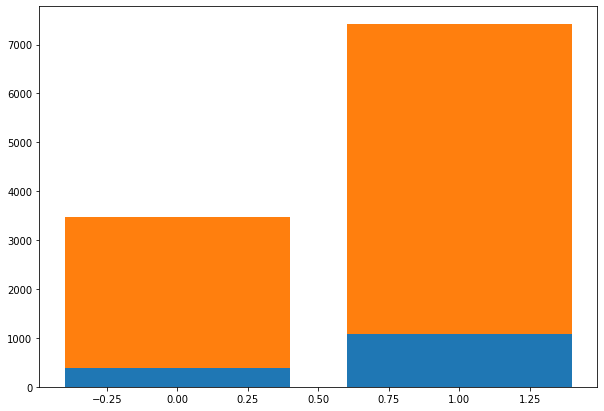

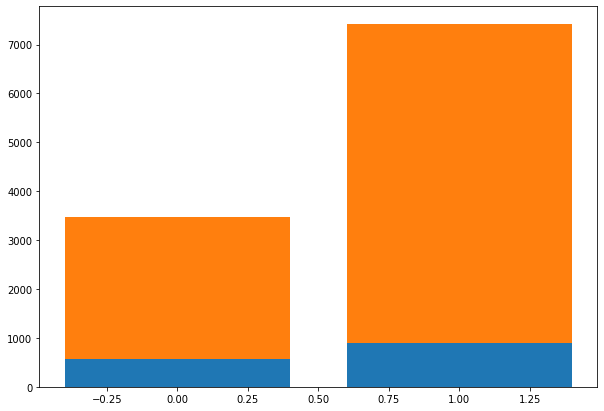

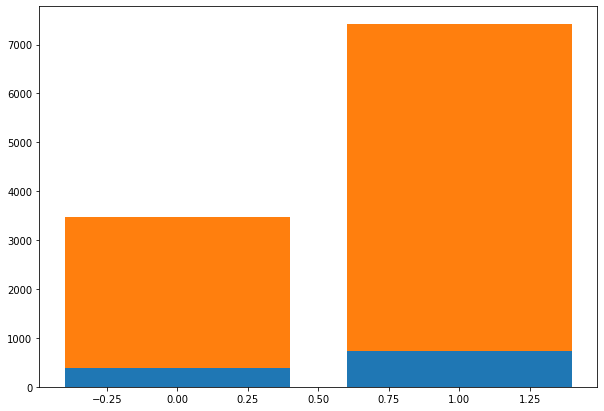

In [47]:
for i in range(9):
    fig, ax = plt.subplots(figsize = (10,7))
    

    workingday_num_for_cluster = np.array([len(df[(df.cluster_id_9==i)&(df.workingday == el)]) for el in workingday_unique])

    workingday_num = np.array([len(df[df.workingday==el]) for el in workingday_unique])

    ax.bar(workingday_unique, workingday_num_for_cluster, label='for cluster')
    ax.bar(workingday_unique, workingday_num-workingday_num_for_cluster, bottom=workingday_num_for_cluster, label='general')
    
    for j, el in enumerate(workingday_unique):
        print("{} of {} ({}) belong to {}-th class".format(workingday_num_for_cluster[j], workingday_num[j], 
                                                           round(workingday_num_for_cluster[j]/workingday_num[j],2), i))
    print()

# Weather

3336 of 7192 (0.46) belong to 0-th class
853 of 2834 (0.3) belong to 0-th class
129 of 859 (0.15) belong to 0-th class
0 of 1 (0.0) belong to 0-th class

3856 of 7192 (0.54) belong to 1-th class
1981 of 2834 (0.7) belong to 1-th class
730 of 859 (0.85) belong to 1-th class
1 of 1 (1.0) belong to 1-th class



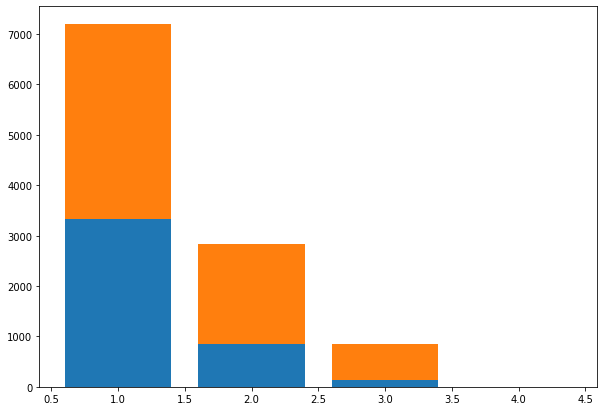

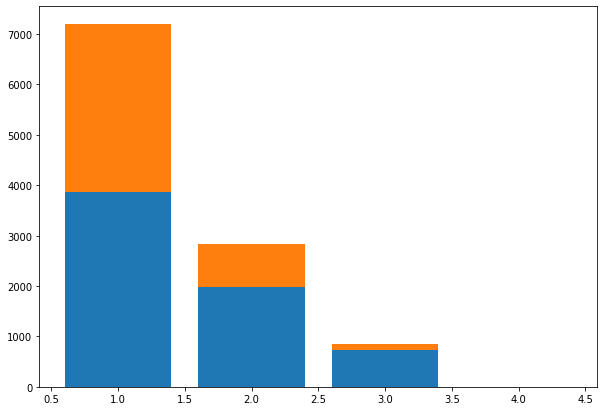

In [48]:
for i in range(2):
    fig, ax = plt.subplots(figsize = (10,7))
    

    weather_num_for_cluster = np.array([len(df[(df.cluster_id_2==i)&(df.weather == el)]) for el in weather_unique])

    weather_num = np.array([len(df[df.weather==el]) for el in weather_unique])

    ax.bar(weather_unique, weather_num_for_cluster, label='for cluster')
    ax.bar(weather_unique, weather_num-weather_num_for_cluster, bottom=weather_num_for_cluster, label='general')
    
    for j, el in enumerate(weather_unique):
        print("{} of {} ({}) belong to {}-th class".format(weather_num_for_cluster[j], weather_num[j], 
                                                           round(weather_num_for_cluster[j]/weather_num[j],2), i))
    print()

2472 of 7192 (0.34) belong to 0-th class
1543 of 2834 (0.54) belong to 0-th class
654 of 859 (0.76) belong to 0-th class
1 of 1 (1.0) belong to 0-th class

2268 of 7192 (0.32) belong to 1-th class
624 of 2834 (0.22) belong to 1-th class
120 of 859 (0.14) belong to 1-th class
0 of 1 (0.0) belong to 1-th class

2452 of 7192 (0.34) belong to 2-th class
667 of 2834 (0.24) belong to 2-th class
85 of 859 (0.1) belong to 2-th class
0 of 1 (0.0) belong to 2-th class



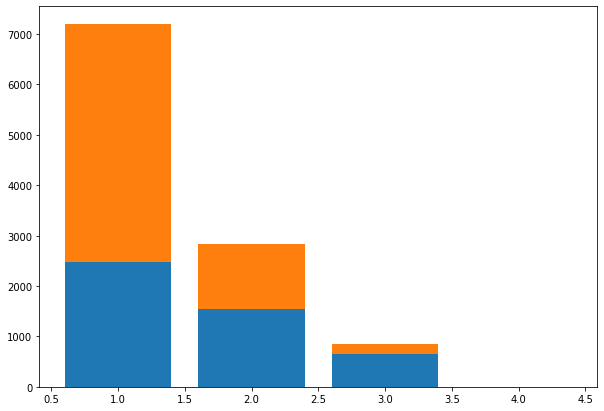

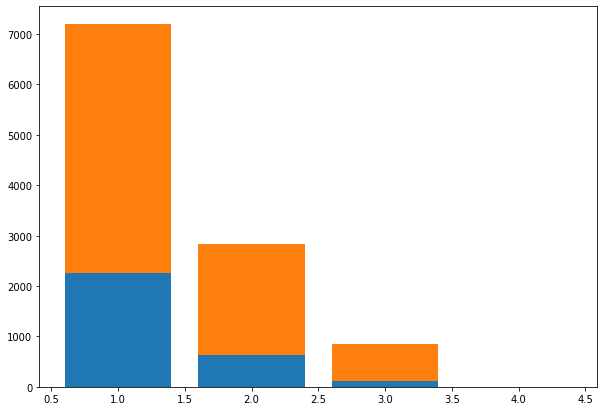

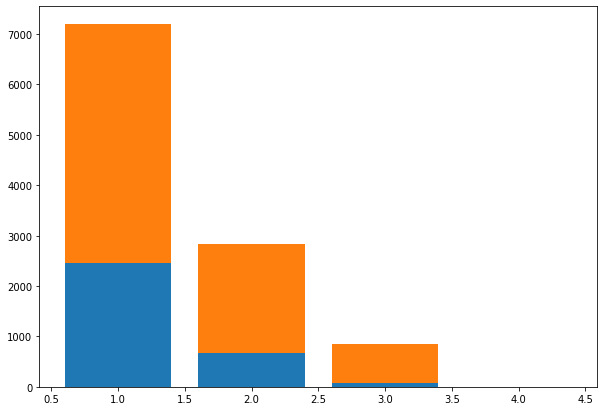

In [49]:
for i in range(3):
    fig, ax = plt.subplots(figsize = (10,7))
    

    weather_num_for_cluster = np.array([len(df[(df.cluster_id_3==i)&(df.weather == el)]) for el in weather_unique])

    weather_num = np.array([len(df[df.weather==el]) for el in weather_unique])

    ax.bar(weather_unique, weather_num_for_cluster, label='for cluster')
    ax.bar(weather_unique, weather_num-weather_num_for_cluster, bottom=weather_num_for_cluster, label='general')
    
    for j, el in enumerate(weather_unique):
        print("{} of {} ({}) belong to {}-th class".format(weather_num_for_cluster[j], weather_num[j], 
                                                           round(weather_num_for_cluster[j]/weather_num[j],2), i))
    print()

1741 of 7192 (0.24) belong to 0-th class
454 of 2834 (0.16) belong to 0-th class
104 of 859 (0.12) belong to 0-th class
0 of 1 (0.0) belong to 0-th class

1642 of 7192 (0.23) belong to 1-th class
872 of 2834 (0.31) belong to 1-th class
238 of 859 (0.28) belong to 1-th class
1 of 1 (1.0) belong to 1-th class

2146 of 7192 (0.3) belong to 2-th class
510 of 2834 (0.18) belong to 2-th class
63 of 859 (0.07) belong to 2-th class
0 of 1 (0.0) belong to 2-th class

1663 of 7192 (0.23) belong to 3-th class
998 of 2834 (0.35) belong to 3-th class
454 of 859 (0.53) belong to 3-th class
0 of 1 (0.0) belong to 3-th class



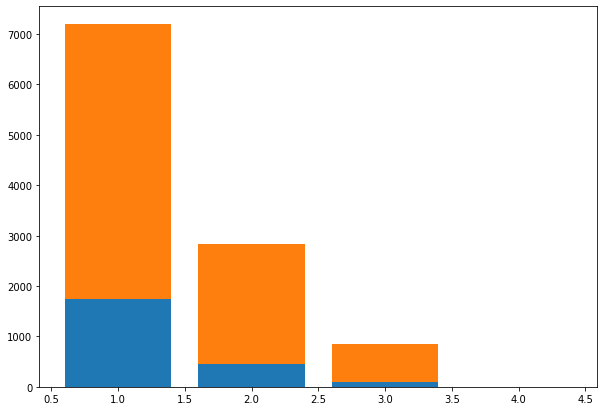

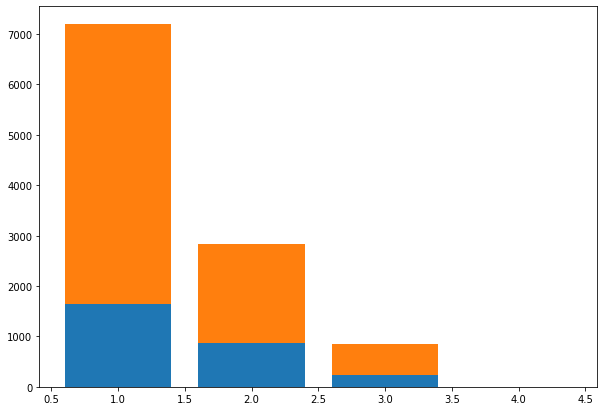

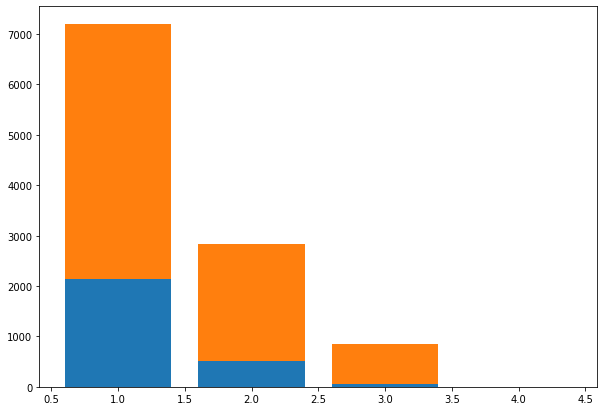

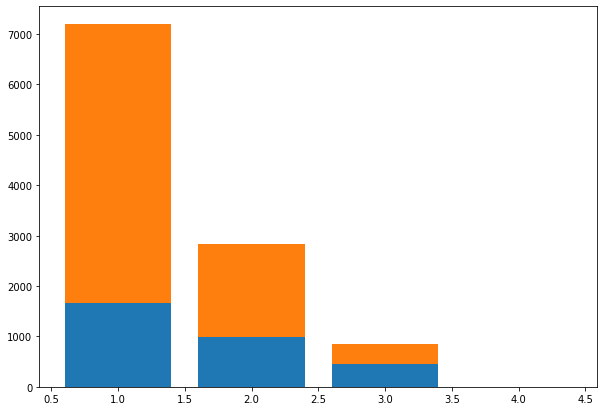

In [50]:
for i in range(4):
    fig, ax = plt.subplots(figsize = (10,7))
    

    weather_num_for_cluster = np.array([len(df[(df.cluster_id_4==i)&(df.weather == el)]) for el in weather_unique])

    weather_num = np.array([len(df[df.weather==el]) for el in weather_unique])

    ax.bar(weather_unique, weather_num_for_cluster, label='for cluster')
    ax.bar(weather_unique, weather_num-weather_num_for_cluster, bottom=weather_num_for_cluster, label='general')
    
    for j, el in enumerate(weather_unique):
        print("{} of {} ({}) belong to {}-th class".format(weather_num_for_cluster[j], weather_num[j], 
                                                           round(weather_num_for_cluster[j]/weather_num[j],2), i))
    print()

1375 of 7192 (0.19) belong to 0-th class
1018 of 2834 (0.36) belong to 0-th class
525 of 859 (0.61) belong to 0-th class
0 of 1 (0.0) belong to 0-th class

1613 of 7192 (0.22) belong to 1-th class
429 of 2834 (0.15) belong to 1-th class
100 of 859 (0.12) belong to 1-th class
0 of 1 (0.0) belong to 1-th class

1568 of 7192 (0.22) belong to 2-th class
688 of 2834 (0.24) belong to 2-th class
156 of 859 (0.18) belong to 2-th class
1 of 1 (1.0) belong to 2-th class

1013 of 7192 (0.14) belong to 3-th class
260 of 2834 (0.09) belong to 3-th class
47 of 859 (0.05) belong to 3-th class
0 of 1 (0.0) belong to 3-th class

1623 of 7192 (0.23) belong to 4-th class
439 of 2834 (0.15) belong to 4-th class
31 of 859 (0.04) belong to 4-th class
0 of 1 (0.0) belong to 4-th class



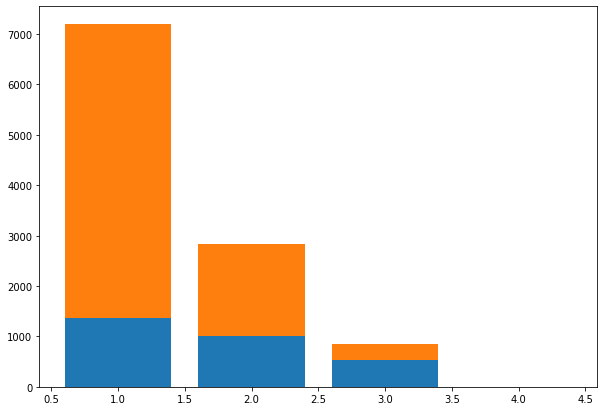

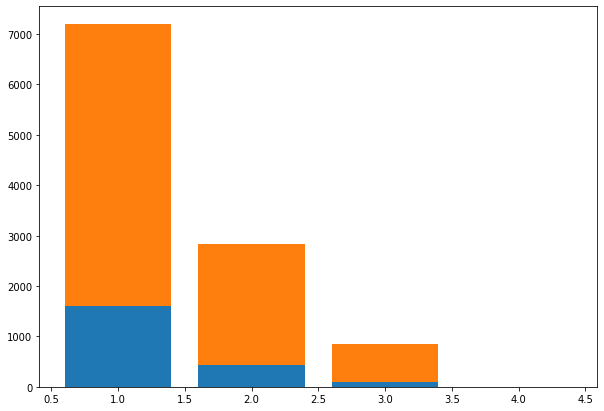

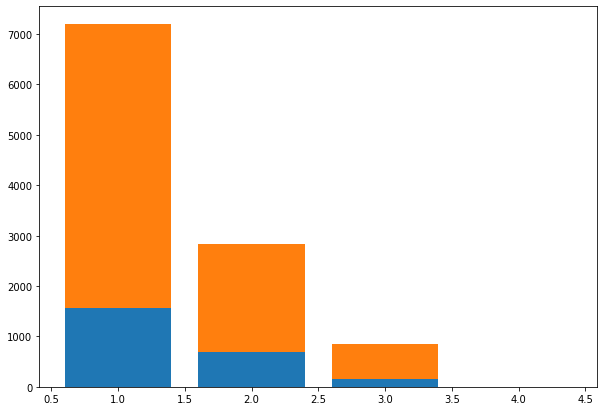

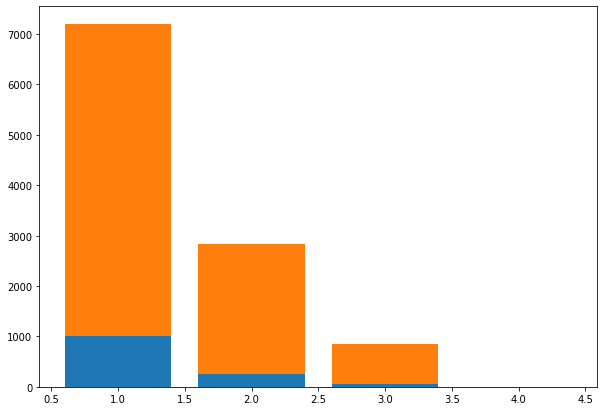

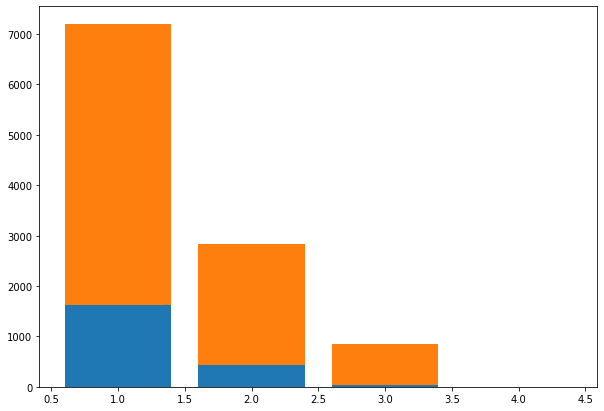

In [51]:
for i in range(5):
    fig, ax = plt.subplots(figsize = (10,7))
    

    weather_num_for_cluster = np.array([len(df[(df.cluster_id_5==i)&(df.weather == el)]) for el in weather_unique])

    weather_num = np.array([len(df[df.weather==el]) for el in weather_unique])

    ax.bar(weather_unique, weather_num_for_cluster, label='for cluster')
    ax.bar(weather_unique, weather_num-weather_num_for_cluster, bottom=weather_num_for_cluster, label='general')
    
    for j, el in enumerate(weather_unique):
        print("{} of {} ({}) belong to {}-th class".format(weather_num_for_cluster[j], weather_num[j], 
                                                           round(weather_num_for_cluster[j]/weather_num[j],2), i))
    print()

1459 of 7192 (0.2) belong to 0-th class
384 of 2834 (0.14) belong to 0-th class
26 of 859 (0.03) belong to 0-th class
0 of 1 (0.0) belong to 0-th class

943 of 7192 (0.13) belong to 1-th class
247 of 2834 (0.09) belong to 1-th class
41 of 859 (0.05) belong to 1-th class
0 of 1 (0.0) belong to 1-th class

938 of 7192 (0.13) belong to 2-th class
226 of 2834 (0.08) belong to 2-th class
69 of 859 (0.08) belong to 2-th class
0 of 1 (0.0) belong to 2-th class

1288 of 7192 (0.18) belong to 3-th class
837 of 2834 (0.3) belong to 3-th class
422 of 859 (0.49) belong to 3-th class
0 of 1 (0.0) belong to 3-th class

1566 of 7192 (0.22) belong to 4-th class
436 of 2834 (0.15) belong to 4-th class
53 of 859 (0.06) belong to 4-th class
0 of 1 (0.0) belong to 4-th class

998 of 7192 (0.14) belong to 5-th class
704 of 2834 (0.25) belong to 5-th class
248 of 859 (0.29) belong to 5-th class
1 of 1 (1.0) belong to 5-th class



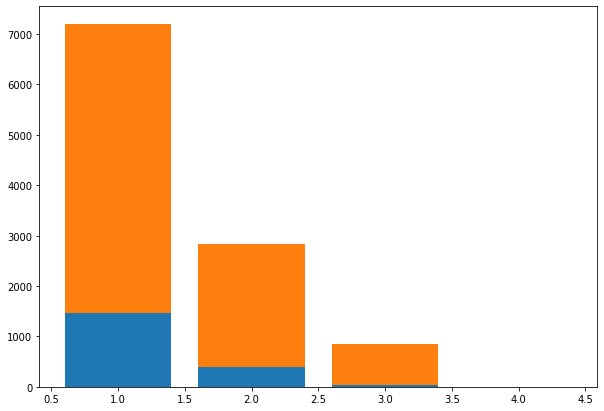

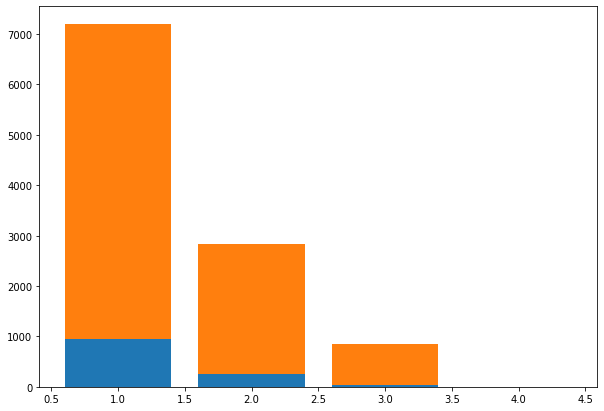

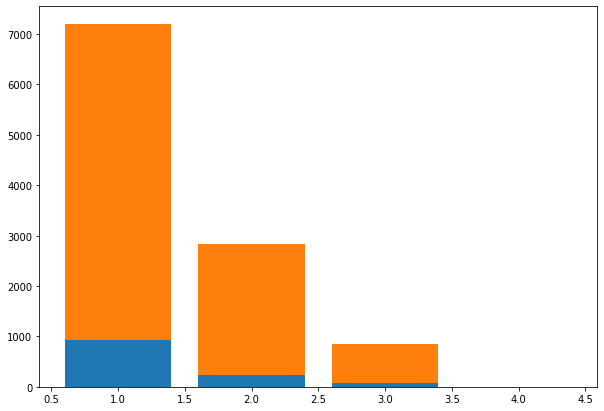

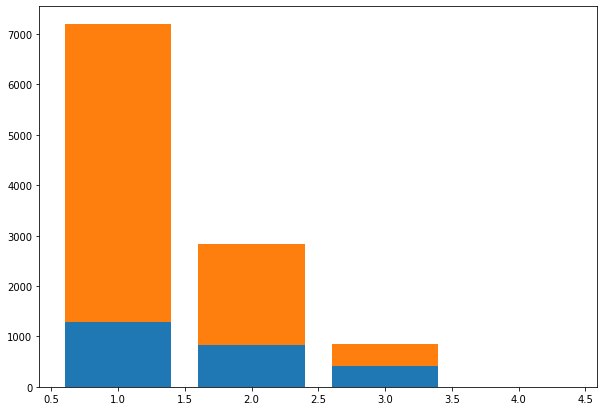

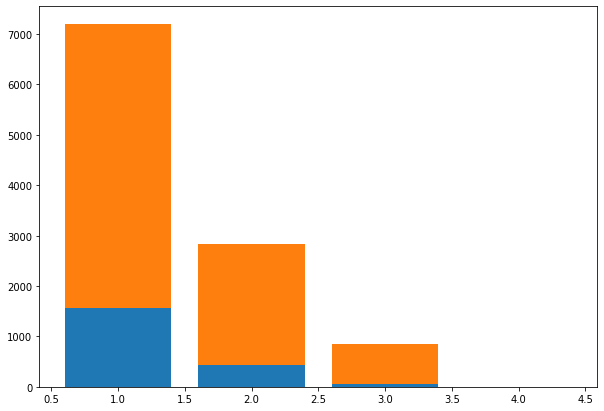

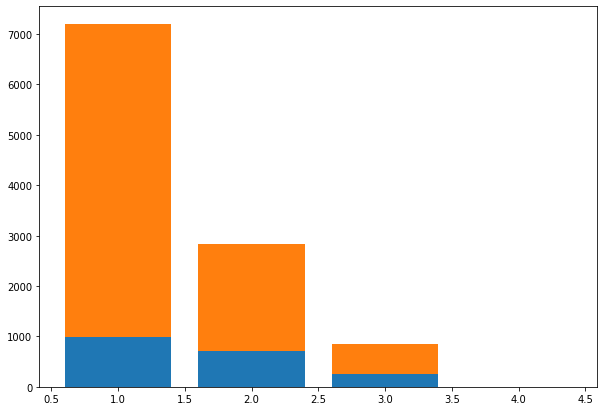

In [52]:
for i in range(6):
    fig, ax = plt.subplots(figsize = (10,7))
    

    weather_num_for_cluster = np.array([len(df[(df.cluster_id_6==i)&(df.weather == el)]) for el in weather_unique])

    weather_num = np.array([len(df[df.weather==el]) for el in weather_unique])

    ax.bar(weather_unique, weather_num_for_cluster, label='for cluster')
    ax.bar(weather_unique, weather_num-weather_num_for_cluster, bottom=weather_num_for_cluster, label='general')
    
    for j, el in enumerate(weather_unique):
        print("{} of {} ({}) belong to {}-th class".format(weather_num_for_cluster[j], weather_num[j], 
                                                           round(weather_num_for_cluster[j]/weather_num[j],2), i))
    print()

1148 of 7192 (0.16) belong to 0-th class
521 of 2834 (0.18) belong to 0-th class
204 of 859 (0.24) belong to 0-th class
0 of 1 (0.0) belong to 0-th class

872 of 7192 (0.12) belong to 1-th class
166 of 2834 (0.06) belong to 1-th class
33 of 859 (0.04) belong to 1-th class
0 of 1 (0.0) belong to 1-th class

1391 of 7192 (0.19) belong to 2-th class
349 of 2834 (0.12) belong to 2-th class
28 of 859 (0.03) belong to 2-th class
0 of 1 (0.0) belong to 2-th class

889 of 7192 (0.12) belong to 3-th class
239 of 2834 (0.08) belong to 3-th class
38 of 859 (0.04) belong to 3-th class
0 of 1 (0.0) belong to 3-th class

1508 of 7192 (0.21) belong to 4-th class
416 of 2834 (0.15) belong to 4-th class
35 of 859 (0.04) belong to 4-th class
0 of 1 (0.0) belong to 4-th class

510 of 7192 (0.07) belong to 5-th class
531 of 2834 (0.19) belong to 5-th class
319 of 859 (0.37) belong to 5-th class
0 of 1 (0.0) belong to 5-th class

874 of 7192 (0.12) belong to 6-th class
612 of 2834 (0.22) belong to 6-th cla

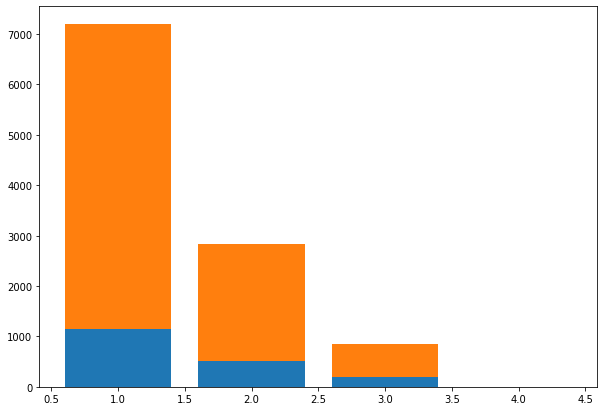

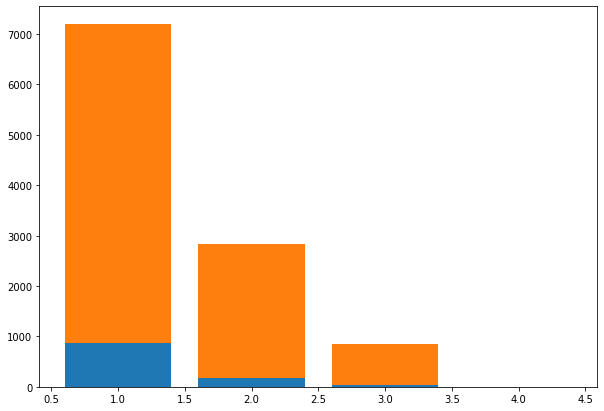

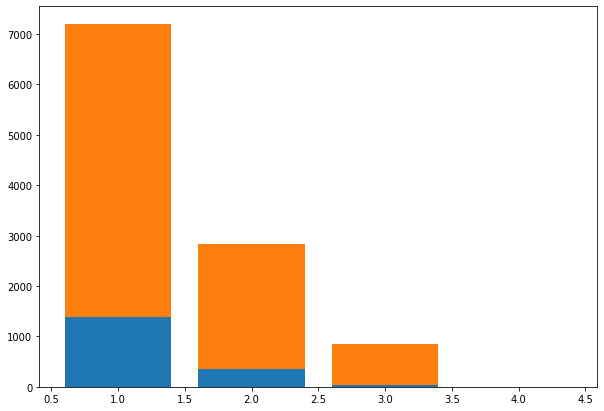

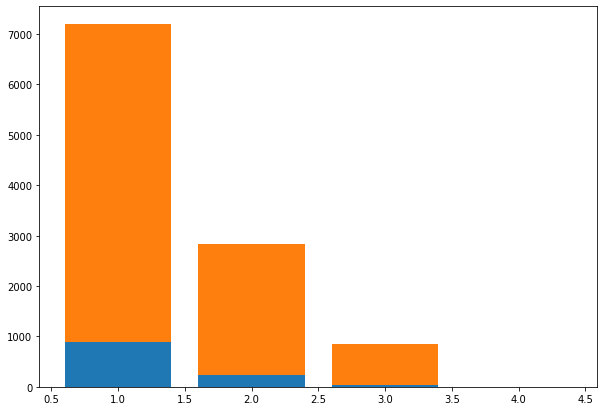

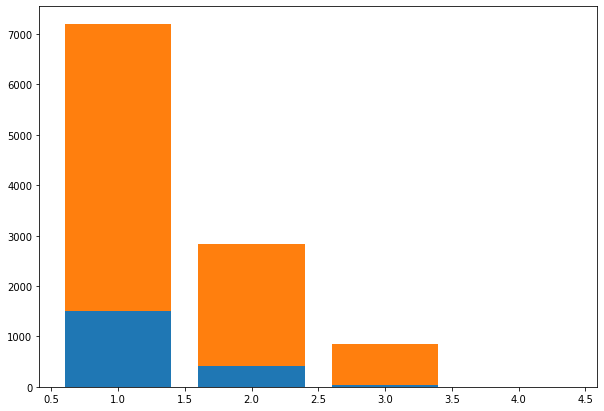

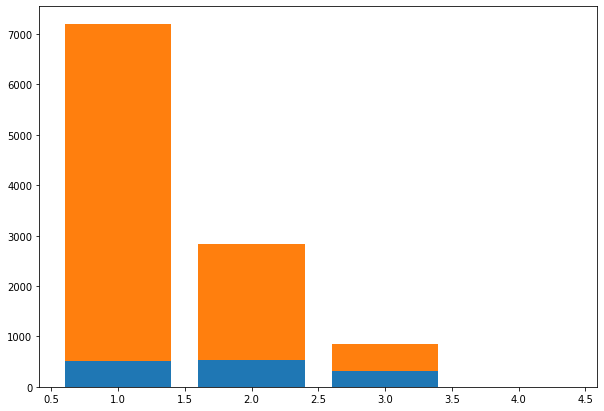

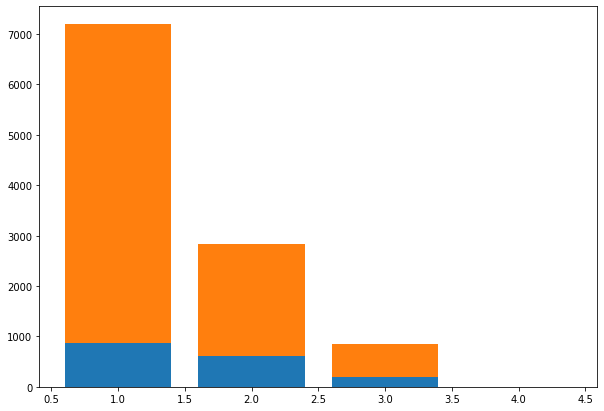

In [53]:
for i in range(7):
    fig, ax = plt.subplots(figsize = (10,7))
    

    weather_num_for_cluster = np.array([len(df[(df.cluster_id_7==i)&(df.weather == el)]) for el in weather_unique])

    weather_num = np.array([len(df[df.weather==el]) for el in weather_unique])

    ax.bar(weather_unique, weather_num_for_cluster, label='for cluster')
    ax.bar(weather_unique, weather_num-weather_num_for_cluster, bottom=weather_num_for_cluster, label='general')
    
    for j, el in enumerate(weather_unique):
        print("{} of {} ({}) belong to {}-th class".format(weather_num_for_cluster[j], weather_num[j], 
                                                           round(weather_num_for_cluster[j]/weather_num[j],2), i))
    print()

717 of 7192 (0.1) belong to 0-th class
101 of 2834 (0.04) belong to 0-th class
18 of 859 (0.02) belong to 0-th class
0 of 1 (0.0) belong to 0-th class

471 of 7192 (0.07) belong to 1-th class
485 of 2834 (0.17) belong to 1-th class
314 of 859 (0.37) belong to 1-th class
0 of 1 (0.0) belong to 1-th class

1259 of 7192 (0.18) belong to 2-th class
308 of 2834 (0.11) belong to 2-th class
22 of 859 (0.03) belong to 2-th class
0 of 1 (0.0) belong to 2-th class

838 of 7192 (0.12) belong to 3-th class
166 of 2834 (0.06) belong to 3-th class
30 of 859 (0.03) belong to 3-th class
0 of 1 (0.0) belong to 3-th class

1054 of 7192 (0.15) belong to 4-th class
458 of 2834 (0.16) belong to 4-th class
195 of 859 (0.23) belong to 4-th class
0 of 1 (0.0) belong to 4-th class

562 of 7192 (0.08) belong to 5-th class
358 of 2834 (0.13) belong to 5-th class
51 of 859 (0.06) belong to 5-th class
0 of 1 (0.0) belong to 5-th class

1455 of 7192 (0.2) belong to 6-th class
393 of 2834 (0.14) belong to 6-th class

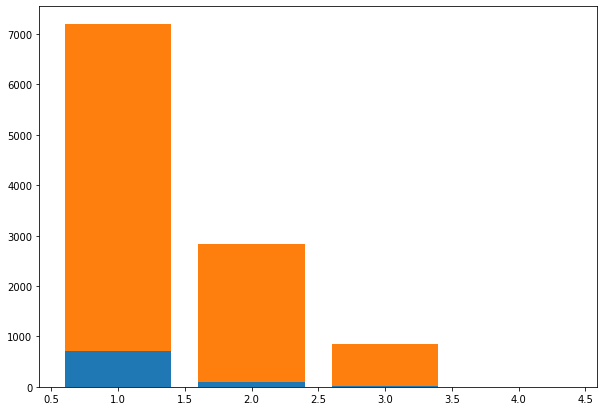

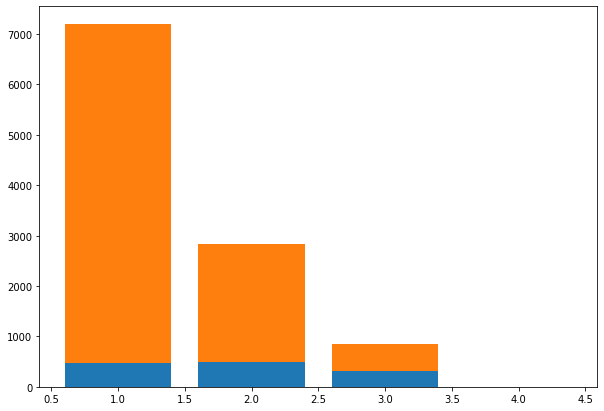

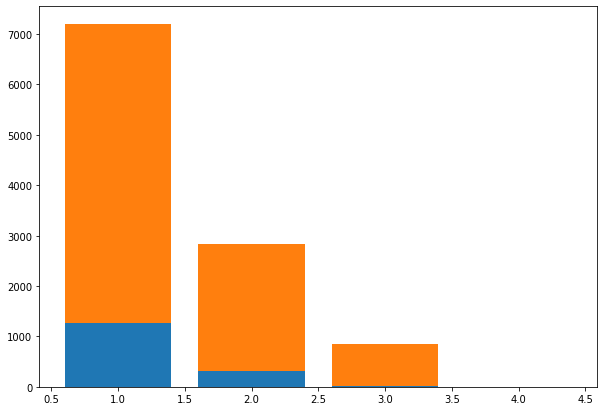

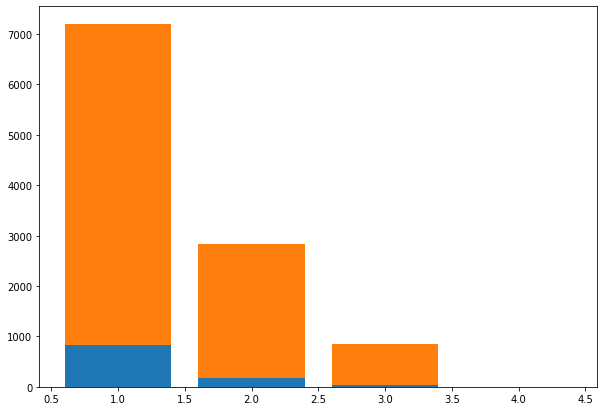

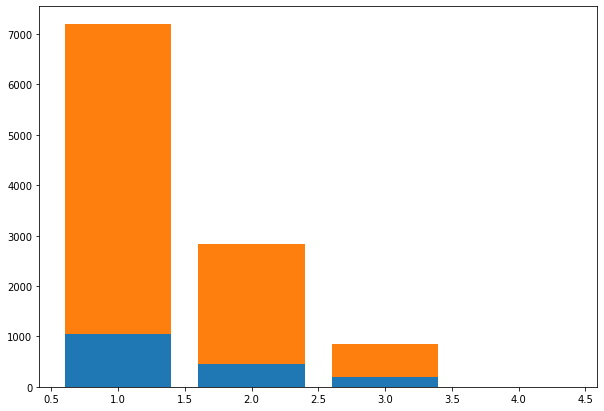

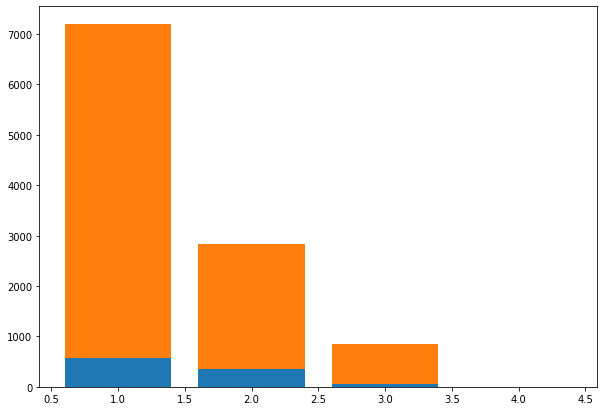

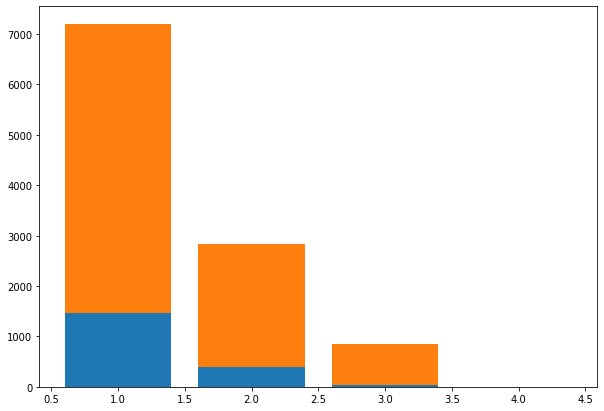

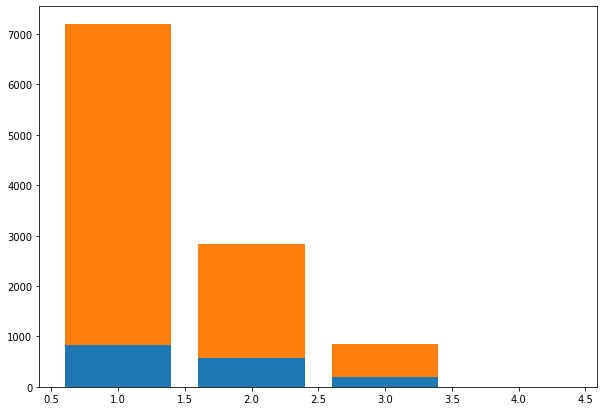

In [54]:
for i in range(8):
    fig, ax = plt.subplots(figsize = (10,7))
    

    weather_num_for_cluster = np.array([len(df[(df.cluster_id_8==i)&(df.weather == el)]) for el in weather_unique])

    weather_num = np.array([len(df[df.weather==el]) for el in weather_unique])

    ax.bar(weather_unique, weather_num_for_cluster, label='for cluster')
    ax.bar(weather_unique, weather_num-weather_num_for_cluster, bottom=weather_num_for_cluster, label='general')
    
    for j, el in enumerate(weather_unique):
        print("{} of {} ({}) belong to {}-th class".format(weather_num_for_cluster[j], weather_num[j], 
                                                           round(weather_num_for_cluster[j]/weather_num[j],2), i))
    print()

1164 of 7192 (0.16) belong to 0-th class
332 of 2834 (0.12) belong to 0-th class
23 of 859 (0.03) belong to 0-th class
0 of 1 (0.0) belong to 0-th class

1017 of 7192 (0.14) belong to 1-th class
425 of 2834 (0.15) belong to 1-th class
187 of 859 (0.22) belong to 1-th class
0 of 1 (0.0) belong to 1-th class

616 of 7192 (0.09) belong to 2-th class
103 of 2834 (0.04) belong to 2-th class
15 of 859 (0.02) belong to 2-th class
0 of 1 (0.0) belong to 2-th class

634 of 7192 (0.09) belong to 3-th class
113 of 2834 (0.04) belong to 3-th class
25 of 859 (0.03) belong to 3-th class
0 of 1 (0.0) belong to 3-th class

468 of 7192 (0.07) belong to 4-th class
490 of 2834 (0.17) belong to 4-th class
305 of 859 (0.36) belong to 4-th class
0 of 1 (0.0) belong to 4-th class

517 of 7192 (0.07) belong to 5-th class
360 of 2834 (0.13) belong to 5-th class
55 of 859 (0.06) belong to 5-th class
0 of 1 (0.0) belong to 5-th class

1162 of 7192 (0.16) belong to 6-th class
283 of 2834 (0.1) belong to 6-th clas

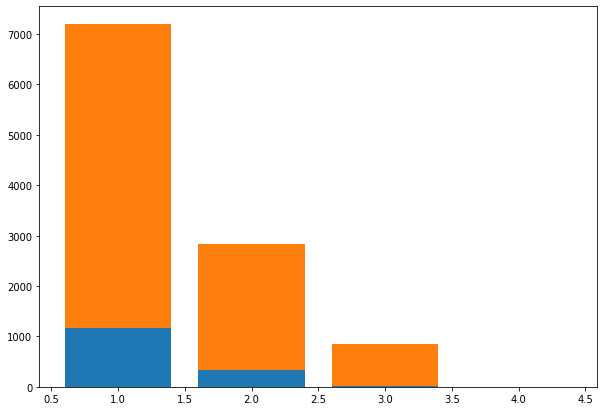

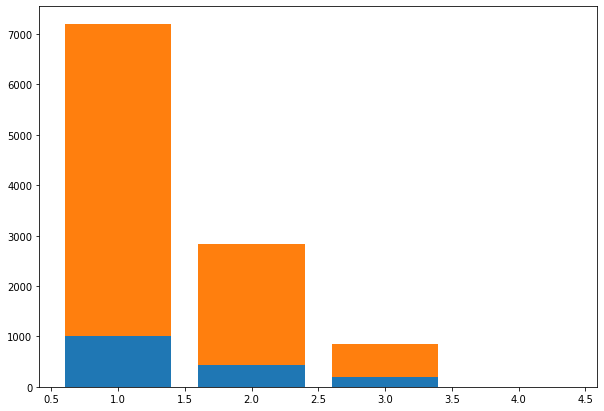

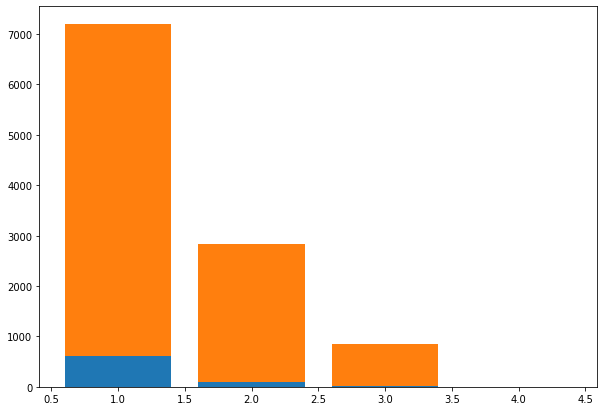

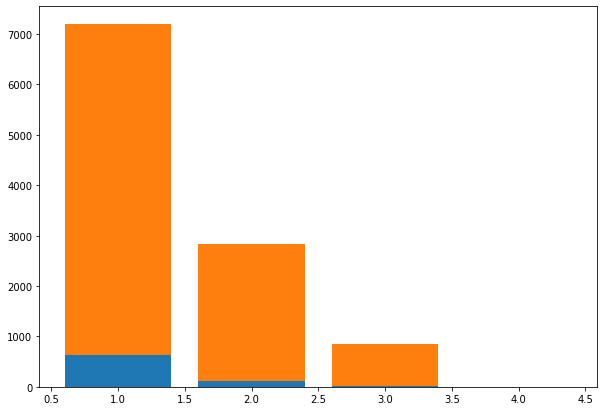

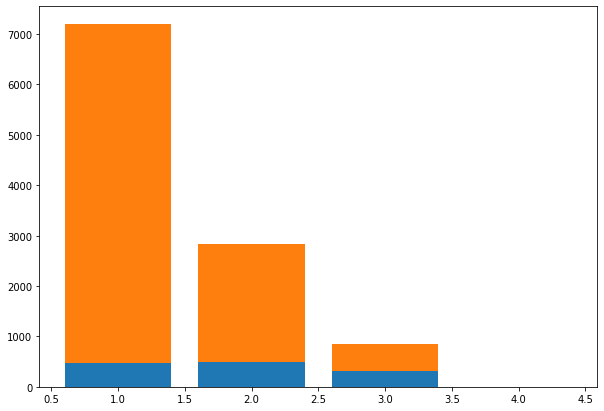

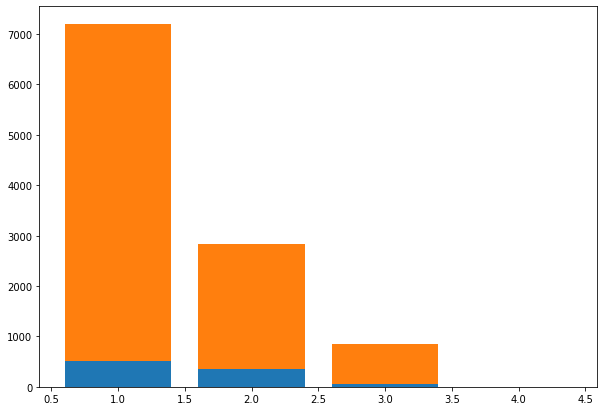

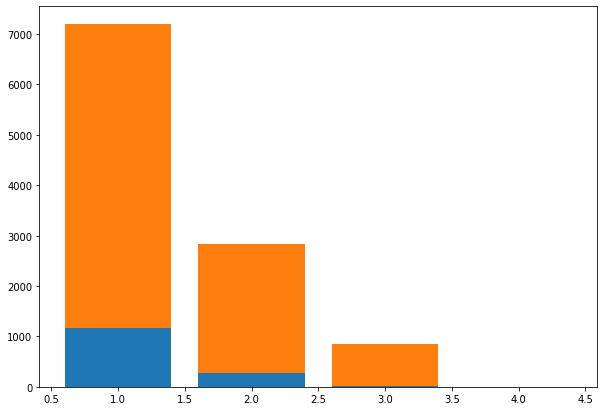

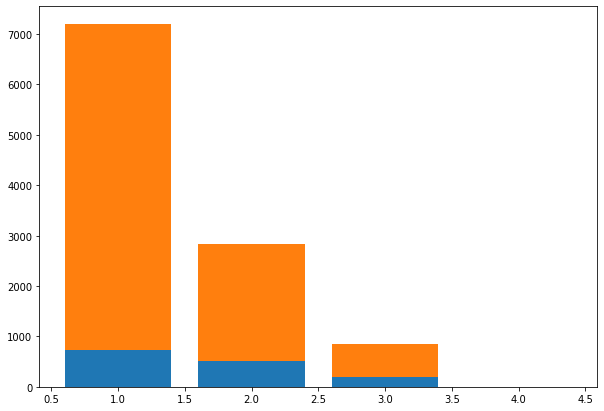

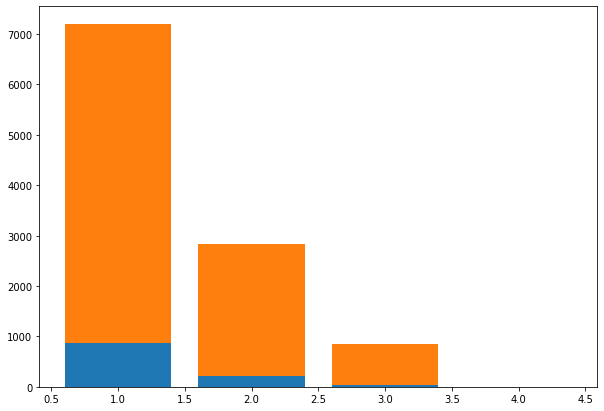

In [55]:
for i in range(9):
    fig, ax = plt.subplots(figsize = (10,7))
    

    weather_num_for_cluster = np.array([len(df[(df.cluster_id_9==i)&(df.weather == el)]) for el in weather_unique])

    weather_num = np.array([len(df[df.weather==el]) for el in weather_unique])

    ax.bar(weather_unique, weather_num_for_cluster, label='for cluster')
    ax.bar(weather_unique, weather_num-weather_num_for_cluster, bottom=weather_num_for_cluster, label='general')
    
    for j, el in enumerate(weather_unique):
        print("{} of {} ({}) belong to {}-th class".format(weather_num_for_cluster[j], weather_num[j], 
                                                           round(weather_num_for_cluster[j]/weather_num[j],2), i))
    print()